In [ ]:
!pip install gymnasium
!pip install minigrid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.7/136.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym

In [ ]:
import gymnasium as gym
import minigrid
from minigrid.wrappers import RGBImgObsWrapper
import matplotlib.pyplot as plt
from IPython import display
import time
import minigrid.envs

env = gym.make("MiniGrid-Empty-5x5-v0", render_mode="rgb_array")

obs, info = env.reset()


In [ ]:
env = gym.make("MiniGrid-Empty-5x5-v0", render_mode="rgb_array")
obs, info = env.reset()

print(obs.keys())  # dict_keys(['image', 'direction', 'mission'])
print(info)

dict_keys(['image', 'direction', 'mission'])
{}


In [ ]:
obs["image"]

array([[[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [8, 1, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]]], dtype=uint8)

In [ ]:
import gymnasium as gym
env = gym.make("MiniGrid-Empty-5x5-v0", render_mode="human")
observation, info = env.reset(seed=42)
for _ in range(1000):
   action = policy(observation)  # User-defined policy function
   observation, reward, terminated, truncated, info = env.step(action)

   if terminated or truncated:
      observation, info = env.reset()
env.close()

In [ ]:
class SarsaAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration probability

        # Extract environment properties
        self.grid_size = 5  # MiniGrid-Empty-5x5 has a 5x5 grid
        self.num_directions = 4  # Agent can face 4 directions
        self.num_actions = env.action_space.n  # Number of possible actions

        # Calculate the total number of states
        self.num_states = self.grid_size * self.grid_size * self.num_directions

        # Initialize the Q-table as a 2D array (state index × action)
        self.q_table = np.zeros((self.num_states, self.num_actions))

    def state_to_index(self, state):
        """Convert a state tuple (x, y, direction) to a single index."""
        x, y, d = state
        return x + y * self.grid_size + d * self.grid_size * self.grid_size

    def extract_state(self):
        """Extract the agent's position (x, y) and direction safely."""
        env_unwrapped = self.env.unwrapped

        if not hasattr(env_unwrapped, "agent_pos") or not hasattr(env_unwrapped, "agent_dir"):
            raise AttributeError("MiniGrid environment does not expose 'agent_pos' or 'agent_dir'")

        x, y = env_unwrapped.agent_pos
        d = env_unwrapped.agent_dir

        return x, y, d

    def choose_action(self, state):
        """Epsilon-greedy action selection."""
        if np.random.uniform(0, 1) < self.epsilon:
            return self.env.action_space.sample()  # Random action
        else:
            state_idx = self.state_to_index(state)
            return np.argmax(self.q_table[state_idx])  # Greedy action

    def update_q_table(self, state, action, reward, next_state, next_action):
        """SARSA update rule."""
        state_idx = self.state_to_index(state)
        next_state_idx = self.state_to_index(next_state)

        # SARSA update: Q(s, a) <- Q(s, a) + α [ r + γ Q(s', a') - Q(s, a) ]
        self.q_table[state_idx, action] += self.alpha * (
            reward + self.gamma * self.q_table[next_state_idx, next_action] - self.q_table[state_idx, action]
        )

def train(agent, env, episodes=500):
    """Train the SARSA agent."""
    for episode in range(episodes):
        obs = env.reset()
        if isinstance(obs, tuple):  # Handle Gym v26+ return type
            obs, _ = obs

        state = agent.extract_state()
        action = agent.choose_action(state)
        done = False
        total_reward = 0

        while not done:
            next_obs, reward, terminated, truncated, _ = env.step(action)
            next_state = agent.extract_state()
            next_action = agent.choose_action(next_state)

            agent.update_q_table(state, action, reward, next_state, next_action)

            state, action = next_state, next_action
            total_reward += reward
            done = terminated or truncated

        if (episode + 1) % 50 == 0:
            print(f"Episode {episode+1}: Total Reward = {total_reward}")

# Initialize the environment
env = gym.make("MiniGrid-Empty-5x5-v0", render_mode="rgb_array")
agent = SarsaAgent(env)
train(agent, env, episodes=500)

Episode 50: Total Reward = 0
Episode 100: Total Reward = 0
Episode 150: Total Reward = 0
Episode 200: Total Reward = 0
Episode 250: Total Reward = 0
Episode 300: Total Reward = 0
Episode 350: Total Reward = 0
Episode 400: Total Reward = 0
Episode 450: Total Reward = 0
Episode 500: Total Reward = 0


Episode 50: Total Reward = 0
Episode 100: Total Reward = 0
Episode 150: Total Reward = 0
Episode 200: Total Reward = 0
Episode 250: Total Reward = 0
Episode 300: Total Reward = 0
Episode 350: Total Reward = 0.487
Episode 400: Total Reward = 0.901
Episode 450: Total Reward = 0.874
Episode 500: Total Reward = 0.946
Episode 550: Total Reward = 0.9279999999999999
Episode 600: Total Reward = 0.946
Episode 650: Total Reward = 0.946
Episode 700: Total Reward = 0.901
Episode 750: Total Reward = 0.901
Episode 800: Total Reward = 0.9279999999999999
Episode 850: Total Reward = 0.9369999999999999
Episode 900: Total Reward = 0.9369999999999999
Episode 950: Total Reward = 0.946
Episode 1000: Total Reward = 0.9369999999999999
Episode 1050: Total Reward = 0.946
Episode 1100: Total Reward = 0.946
Episode 1150: Total Reward = 0.946
Episode 1200: Total Reward = 0.919
Episode 1250: Total Reward = 0.9279999999999999
Episode 1300: Total Reward = 0.946
Episode 1350: Total Reward = 0.946
Episode 1400: Total R

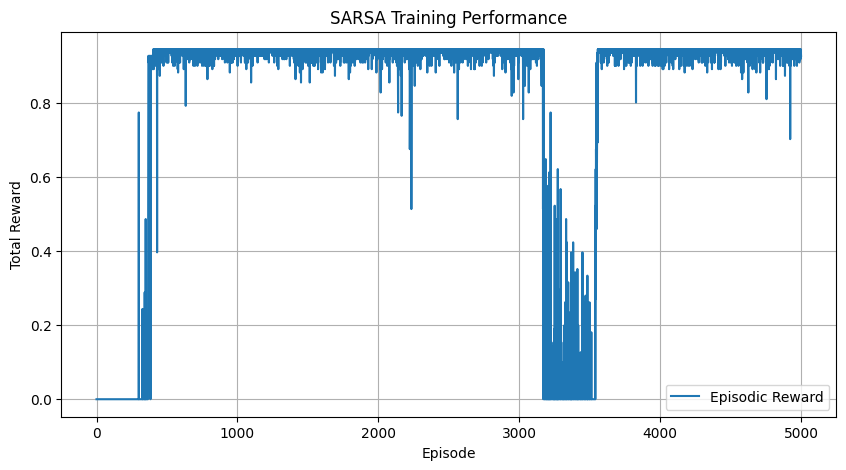

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

class SarsaAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration probability

        # Extract environment properties
        self.grid_size = 5  # MiniGrid-Empty-5x5 has a 5x5 grid
        self.num_directions = 4  # Agent can face 4 directions
        self.num_actions = env.action_space.n  # Number of possible actions

        # Calculate the total number of states
        self.num_states = self.grid_size * self.grid_size * self.num_directions

        # Initialize the Q-table as a 2D array (state index × action)
        self.q_table = np.zeros((self.num_states, self.num_actions))

    def state_to_index(self, state):
        """Convert a state tuple (x, y, direction) to a single index."""
        x, y, d = state
        return x + y * self.grid_size + d * self.grid_size * self.grid_size

    def extract_state(self):
        """Extract the agent's position (x, y) and direction safely."""
        env_unwrapped = self.env.unwrapped

        if not hasattr(env_unwrapped, "agent_pos") or not hasattr(env_unwrapped, "agent_dir"):
            raise AttributeError("MiniGrid environment does not expose 'agent_pos' or 'agent_dir'")

        x, y = env_unwrapped.agent_pos
        d = env_unwrapped.agent_dir

        return x, y, d

    def choose_action(self, state):
        """Epsilon-greedy action selection."""
        if np.random.uniform(0, 1) < self.epsilon:
            return self.env.action_space.sample()  # Random action
        else:
            state_idx = self.state_to_index(state)
            return np.argmax(self.q_table[state_idx])  # Greedy action

    def update_q_table(self, state, action, reward, next_state, next_action):
        """SARSA update rule."""
        state_idx = self.state_to_index(state)
        next_state_idx = self.state_to_index(next_state)

        # SARSA update: Q(s, a) <- Q(s, a) + α [ r + γ Q(s', a') - Q(s, a) ]
        self.q_table[state_idx, action] += self.alpha * (
            reward + self.gamma * self.q_table[next_state_idx, next_action] - self.q_table[state_idx, action]
        )

def train(agent, env, episodes=500):
    """Train the SARSA agent and return episodic rewards."""
    rewards_per_episode = []

    for episode in range(episodes):
        obs = env.reset()
        if isinstance(obs, tuple):  # Handle Gym v26+ return type
            obs, _ = obs

        state = agent.extract_state()
        action = agent.choose_action(state)
        done = False
        total_reward = 0

        while not done:
            next_obs, reward, terminated, truncated, _ = env.step(action)
            next_state = agent.extract_state()
            next_action = agent.choose_action(next_state)

            agent.update_q_table(state, action, reward, next_state, next_action)

            state, action = next_state, next_action
            total_reward += reward
            done = terminated or truncated

        rewards_per_episode.append(total_reward)

        if (episode + 1) % 50 == 0:
            print(f"Episode {episode+1}: Total Reward = {total_reward}")

    return rewards_per_episode

# Initialize the environment
env = gym.make("MiniGrid-Empty-5x5-v0", render_mode="rgb_array")
agent = SarsaAgent(env)
rewards = train(agent, env, episodes=5000)

# Plot episodic rewards
plt.figure(figsize=(10, 5))
plt.plot(rewards, label="Episodic Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("SARSA Training Performance")
plt.legend()
plt.grid()
plt.show()


Action Space: Discrete(3)
Observation Space: Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), uint8), 'mission': MissionSpace(<function DynamicObstaclesEnv._gen_mission at 0x7bf56eb000e0>, None))
Starting training...
Episode 100: Avg Reward = -0.98, Avg Steps = 5.63, Success Rate = 1.0%, Epsilon = 0.606
Episode 200: Avg Reward = -0.96, Avg Steps = 8.92, Success Rate = 2.0%, Epsilon = 0.367
Episode 300: Avg Reward = -0.96, Avg Steps = 12.23, Success Rate = 2.0%, Epsilon = 0.222
Episode 400: Avg Reward = -0.93, Avg Steps = 20.88, Success Rate = 4.0%, Epsilon = 0.135
Episode 500: Avg Reward = -0.43, Avg Steps = 26.74, Success Rate = 32.0%, Epsilon = 0.082
Episode 600: Avg Reward = 0.05, Avg Steps = 28.36, Success Rate = 61.0%, Epsilon = 0.050
Episode 700: Avg Reward = 0.21, Avg Steps = 25.13, Success Rate = 68.0%, Epsilon = 0.050
Episode 800: Avg Reward = 0.26, Avg Steps = 28.21, Success Rate = 73.0%, Epsilon = 0.050
Episode 900: Avg Reward = 0.28, Avg Steps = 30.74, Success

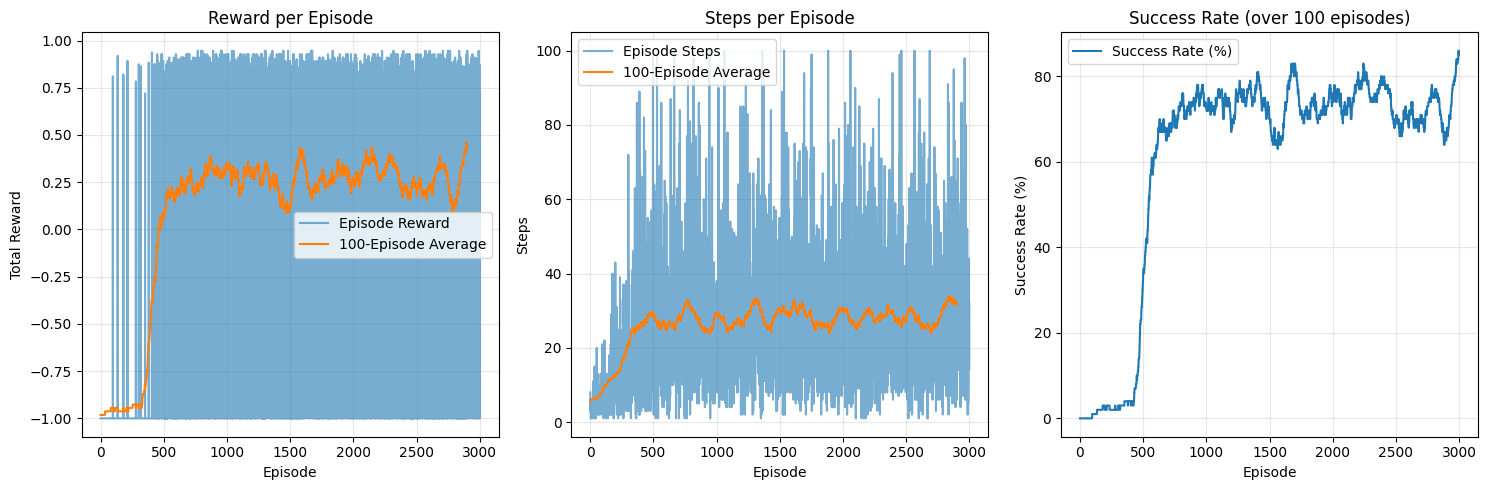


Testing the trained agent:
Test Episode 1: Total Reward = 0.73, Steps = 30, Success = True
Test Episode 2: Total Reward = 0.838, Steps = 18, Success = True
Test Episode 3: Total Reward = 0.838, Steps = 18, Success = True
Test Episode 4: Total Reward = 0.631, Steps = 41, Success = True
Test Episode 5: Total Reward = 0.55, Steps = 50, Success = True
Test Episode 6: Total Reward = 0.784, Steps = 24, Success = True
Test Episode 7: Total Reward = 0.469, Steps = 59, Success = True
Test Episode 8: Total Reward = 0.604, Steps = 44, Success = True
Test Episode 9: Total Reward = 0.631, Steps = 41, Success = True
Test Episode 10: Total Reward = 0.631, Steps = 41, Success = True

Test Results: Success Rate = 100.0%, Average Reward = 0.67


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from minigrid.wrappers import ImgObsWrapper, RGBImgObsWrapper

class QLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.995):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # For epsilon-greedy policy
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay

        # For Dynamic-Obstacles-5x5, we need a good state representation
        self.q_table = {}
        self.num_actions = env.action_space.n

    def get_state_key(self, obs):
        """
        Create a state representation from the MiniGrid environment state.
        This is crucial for the Dynamic-Obstacles environment.
        """
        # Access the grid directly for a more meaningful state representation
        env_grid = self.env.unwrapped.grid.encode()
        agent_pos = self.env.unwrapped.agent_pos
        agent_dir = self.env.unwrapped.agent_dir

        # Create a view around the agent (3x3 grid + agent direction)
        x, y = agent_pos

        # Get surrounding cells, focusing on obstacles
        surrounding = []
        for i in range(max(0, x-1), min(x+2, self.env.unwrapped.width)):
            for j in range(max(0, y-1), min(y+2, self.env.unwrapped.height)):
                # Store cell type (0 if empty, otherwise object type)
                cell_type = env_grid[j, i, 0]  # Note: grid is indexed as [y, x]
                surrounding.append(int(cell_type))

        # Create a state representation with agent position, direction, and surrounding objects
        state_tuple = (x, y, agent_dir) + tuple(surrounding)
        return hash(state_tuple)

    def get_q_values(self, state_key):
        """Get Q-values for the state, initializing if necessary."""
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.num_actions)
        return self.q_table[state_key]

    def choose_action(self, state_key):
        """Epsilon-greedy action selection."""
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()  # Random action
        else:
            q_values = self.get_q_values(state_key)
            # Handle ties randomly for better exploration
            max_q = np.max(q_values)
            actions = np.where(q_values == max_q)[0]
            return np.random.choice(actions)

    def update_q_table(self, state_key, action, reward, next_state_key, done):
        """Q-learning update rule."""
        q_values = self.get_q_values(state_key)
        next_q_values = self.get_q_values(next_state_key)

        # Q-learning update: Q(s,a) ← Q(s,a) + α[r + γ max_a' Q(s',a') - Q(s,a)]
        best_next_q = np.max(next_q_values) if not done else 0
        q_values[action] += self.alpha * (reward + self.gamma * best_next_q - q_values[action])

    def decay_epsilon(self):
        """Decay epsilon according to the defined schedule."""
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

def train(agent, env, episodes=3000):
    """Train the Q-learning agent and return episodic rewards."""
    rewards_per_episode = []
    steps_per_episode = []
    success_rate = []
    success_window = 100  # Track success over last 100 episodes

    for episode in range(episodes):
        # Reset environment
        obs, _ = env.reset()
        state_key = agent.get_state_key(obs)

        done = False
        total_reward = 0
        steps = 0
        success = False

        while not done:
            action = agent.choose_action(state_key)
            next_obs, reward, terminated, truncated, info = env.step(action)
            next_state_key = agent.get_state_key(next_obs)
            done = terminated or truncated

            # Update Q-table with the native reward
            agent.update_q_table(state_key, action, reward, next_state_key, done)

            # Update for next iteration
            state_key = next_state_key
            total_reward += reward
            steps += 1

            # Set success flag if goal reached (reward will be positive)
            if reward > 0:
                success = True

            # Enforce episode limit to prevent infinite loops during training
            if steps >= 100:  # You can adjust this limit
                done = True

        rewards_per_episode.append(total_reward)
        steps_per_episode.append(steps)
        success_rate.append(1 if success else 0)

        # Decay epsilon
        agent.decay_epsilon()

        if (episode + 1) % 100 == 0:
            recent_success_rate = np.mean(success_rate[-100:]) * 100
            avg_reward = np.mean(rewards_per_episode[-100:])
            avg_steps = np.mean(steps_per_episode[-100:])
            print(f"Episode {episode+1}: Avg Reward = {avg_reward:.2f}, Avg Steps = {avg_steps:.2f}, Success Rate = {recent_success_rate:.1f}%, Epsilon = {agent.epsilon:.3f}")

    return rewards_per_episode, steps_per_episode, success_rate

def test_agent(agent, env, episodes=10):
    """Test the agent's performance."""
    total_rewards = []
    total_successes = 0

    print("\nTesting the trained agent:")
    for episode in range(episodes):
        obs, _ = env.reset()
        state_key = agent.get_state_key(obs)
        done = False
        total_reward = 0
        steps = 0
        success = False

        while not done:
            # Use greedy policy for testing
            q_values = agent.get_q_values(state_key)
            max_q = np.max(q_values)
            actions = np.where(q_values == max_q)[0]
            action = np.random.choice(actions)  # Break ties randomly

            next_obs, reward, terminated, truncated, _ = env.step(action)
            next_state_key = agent.get_state_key(next_obs)
            done = terminated or truncated

            state_key = next_state_key
            total_reward += reward
            steps += 1

            if reward > 0:
                success = True

            # Prevent infinite loops
            if steps >= 100:
                done = True

        total_rewards.append(total_reward)
        if success:
            total_successes += 1

        print(f"Test Episode {episode+1}: Total Reward = {total_reward}, Steps = {steps}, Success = {success}")

    success_rate = (total_successes / episodes) * 100
    avg_reward = np.mean(total_rewards)
    print(f"\nTest Results: Success Rate = {success_rate:.1f}%, Average Reward = {avg_reward:.2f}")


# Main execution
if __name__ == "__main__":
    # Create the environment
    env = gym.make("MiniGrid-Dynamic-Obstacles-5x5-v0", render_mode="rgb_array")

    # Print environment information for debugging
    print(f"Action Space: {env.action_space}")
    print(f"Observation Space: {env.observation_space}")

    # Initialize agent
    agent = QLearningAgent(env)

    # Train the agent
    print("Starting training...")
    rewards, steps, successes = train(agent, env, episodes=3000)

    # Plot the results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(rewards, alpha=0.6, label='Episode Reward')
    plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'), label='100-Episode Average')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Reward per Episode')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 2)
    plt.plot(steps, alpha=0.6, label='Episode Steps')
    plt.plot(np.convolve(steps, np.ones(100)/100, mode='valid'), label='100-Episode Average')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 3)
    window_size = 100
    success_rates = [np.mean(successes[max(0, i-window_size):i])*100 if i > 0 else 0 for i in range(1, len(successes)+1)]
    plt.plot(success_rates, label='Success Rate (%)')
    plt.xlabel('Episode')
    plt.ylabel('Success Rate (%)')
    plt.title(f'Success Rate (over {window_size} episodes)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('q_learning_dynamic_obstacles_results.png')
    plt.show()

    # Test the trained agent
    test_agent(agent, env)

Action Space: Discrete(3)
Observation Space: Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), uint8), 'mission': MissionSpace(<function DynamicObstaclesEnv._gen_mission at 0x7bf56eb000e0>, None))
Starting training...
Episode 100: Avg Reward = -0.98, Avg Steps = 6.11, Success Rate = 1.0%, Tau = 0.606
Episode 200: Avg Reward = -1.00, Avg Steps = 7.83, Success Rate = 0.0%, Tau = 0.367
Episode 300: Avg Reward = -0.98, Avg Steps = 13.22, Success Rate = 1.0%, Tau = 0.222
Episode 400: Avg Reward = -0.92, Avg Steps = 21.76, Success Rate = 5.0%, Tau = 0.135
Episode 500: Avg Reward = -0.84, Avg Steps = 33.14, Success Rate = 8.0%, Tau = 0.100
Episode 600: Avg Reward = -0.78, Avg Steps = 38.12, Success Rate = 11.0%, Tau = 0.100
Episode 700: Avg Reward = -0.52, Avg Steps = 44.66, Success Rate = 23.0%, Tau = 0.100
Episode 800: Avg Reward = -0.21, Avg Steps = 49.40, Success Rate = 41.0%, Tau = 0.100
Episode 900: Avg Reward = -0.33, Avg Steps = 46.95, Success Rate = 38.0%, Tau = 0.100
Ep

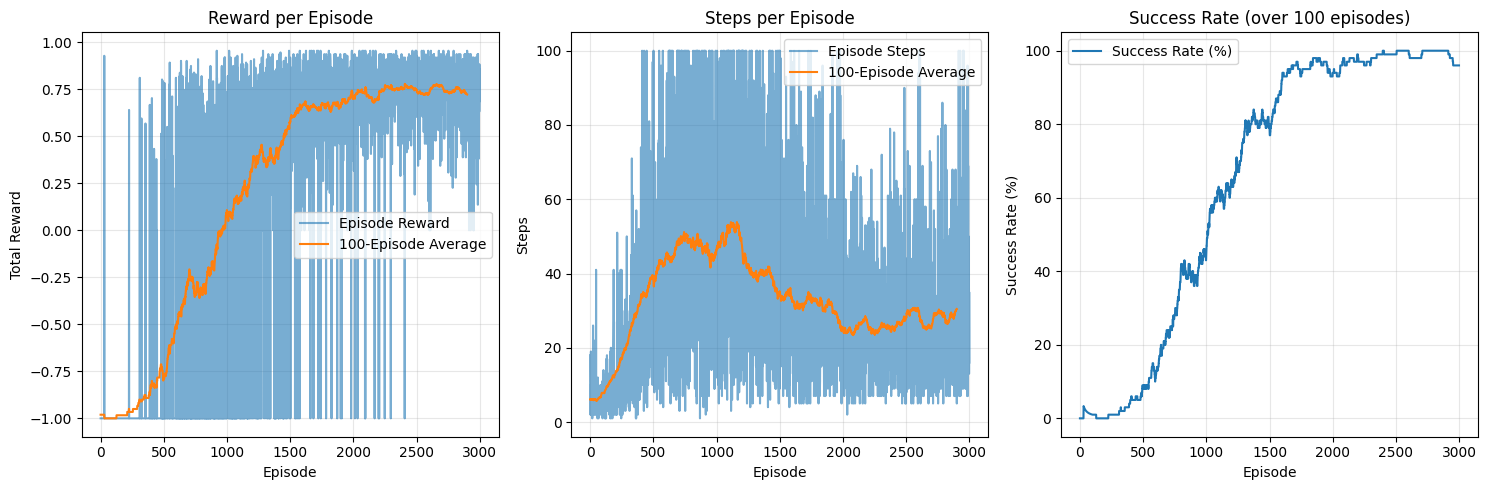


Testing the trained agent:
Test Episode 1: Total Reward = 0.9279999999999999, Steps = 8, Success = True
Test Episode 2: Total Reward = 0.919, Steps = 9, Success = True
Test Episode 3: Total Reward = 0.883, Steps = 13, Success = True
Test Episode 4: Total Reward = 0.883, Steps = 13, Success = True
Test Episode 5: Total Reward = 0.91, Steps = 10, Success = True
Test Episode 6: Total Reward = 0.73, Steps = 30, Success = True
Test Episode 7: Total Reward = 0.865, Steps = 15, Success = True
Test Episode 8: Total Reward = 0.9369999999999999, Steps = 7, Success = True
Test Episode 9: Total Reward = 0.8109999999999999, Steps = 21, Success = True
Test Episode 10: Total Reward = 0.802, Steps = 22, Success = True

Test Results: Success Rate = 100.0%, Average Reward = 0.87


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from minigrid.wrappers import ImgObsWrapper, RGBImgObsWrapper

class SoftmaxQLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, tau=1.0, tau_min=0.1, tau_decay=0.995):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.tau = tau      # Temperature parameter for softmax
        self.tau_min = tau_min  # Minimum temperature
        self.tau_decay = tau_decay  # Temperature decay rate

        # For Dynamic-Obstacles-5x5, we need a good state representation
        self.q_table = {}
        self.num_actions = env.action_space.n

    def get_state_key(self, obs):
        """
        Create a state representation from the MiniGrid environment state.
        This is crucial for the Dynamic-Obstacles environment.
        """
        # Access the grid directly for a more meaningful state representation
        env_grid = self.env.unwrapped.grid.encode()
        agent_pos = self.env.unwrapped.agent_pos
        agent_dir = self.env.unwrapped.agent_dir

        # Create a view around the agent (3x3 grid + agent direction)
        x, y = agent_pos

        # Get surrounding cells, focusing on obstacles
        surrounding = []
        for i in range(max(0, x-1), min(x+2, self.env.unwrapped.width)):
            for j in range(max(0, y-1), min(y+2, self.env.unwrapped.height)):
                # Store cell type (0 if empty, otherwise object type)
                cell_type = env_grid[j, i, 0]  # Note: grid is indexed as [y, x]
                surrounding.append(int(cell_type))

        # Create a state representation with agent position, direction, and surrounding objects
        state_tuple = (x, y, agent_dir) + tuple(surrounding)
        return hash(state_tuple)

    def get_q_values(self, state_key):
        """Get Q-values for the state, initializing if necessary."""
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.num_actions)
        return self.q_table[state_key]

    def softmax(self, q_values):
        """Compute softmax probabilities for action selection."""
        # Prevent overflow by subtracting the maximum value
        q_values = q_values - np.max(q_values)
        exp_values = np.exp(q_values / self.tau)
        probabilities = exp_values / np.sum(exp_values)
        return probabilities

    def choose_action(self, state_key):
        """Softmax-based action selection."""
        q_values = self.get_q_values(state_key)
        probabilities = self.softmax(q_values)

        # Choose action based on the probability distribution
        action = np.random.choice(self.num_actions, p=probabilities)
        return action

    def update_q_table(self, state_key, action, reward, next_state_key, done):
        """Q-learning update rule."""
        q_values = self.get_q_values(state_key)
        next_q_values = self.get_q_values(next_state_key)

        # Q-learning update: Q(s,a) ← Q(s,a) + α[r + γ max_a' Q(s',a') - Q(s,a)]
        best_next_q = np.max(next_q_values) if not done else 0
        q_values[action] += self.alpha * (reward + self.gamma * best_next_q - q_values[action])

    def decay_temperature(self):
        """Decay the temperature parameter for softmax."""
        if self.tau > self.tau_min:
            self.tau *= self.tau_decay

def train(agent, env, episodes=3000):
    """Train the Q-learning agent with softmax exploration and return episodic rewards."""
    rewards_per_episode = []
    steps_per_episode = []
    success_rate = []

    for episode in range(episodes):
        # Reset environment
        obs, _ = env.reset()
        state_key = agent.get_state_key(obs)

        done = False
        total_reward = 0
        steps = 0
        success = False

        while not done:
            action = agent.choose_action(state_key)
            next_obs, reward, terminated, truncated, info = env.step(action)
            next_state_key = agent.get_state_key(next_obs)
            done = terminated or truncated

            # Update Q-table with the native reward
            agent.update_q_table(state_key, action, reward, next_state_key, done)

            # Update for next iteration
            state_key = next_state_key
            total_reward += reward
            steps += 1

            # Set success flag if goal reached (reward will be positive)
            if reward > 0:
                success = True

            # Enforce episode limit to prevent infinite loops during training
            if steps >= 100:
                done = True

        rewards_per_episode.append(total_reward)
        steps_per_episode.append(steps)
        success_rate.append(1 if success else 0)

        # Decay temperature
        agent.decay_temperature()

        if (episode + 1) % 100 == 0:
            recent_success_rate = np.mean(success_rate[-100:]) * 100
            avg_reward = np.mean(rewards_per_episode[-100:])
            avg_steps = np.mean(steps_per_episode[-100:])
            print(f"Episode {episode+1}: Avg Reward = {avg_reward:.2f}, Avg Steps = {avg_steps:.2f}, Success Rate = {recent_success_rate:.1f}%, Tau = {agent.tau:.3f}")

    return rewards_per_episode, steps_per_episode, success_rate

def test_agent(agent, env, episodes=10):
    """Test the agent's performance using greedy action selection."""
    total_rewards = []
    total_successes = 0

    print("\nTesting the trained agent:")
    for episode in range(episodes):
        obs, _ = env.reset()
        state_key = agent.get_state_key(obs)
        done = False
        total_reward = 0
        steps = 0
        success = False

        while not done:
            # Use greedy policy for testing
            q_values = agent.get_q_values(state_key)
            action = np.argmax(q_values)

            next_obs, reward, terminated, truncated, _ = env.step(action)
            next_state_key = agent.get_state_key(next_obs)
            done = terminated or truncated

            state_key = next_state_key
            total_reward += reward
            steps += 1

            if reward > 0:
                success = True

            # Prevent infinite loops
            if steps >= 100:
                done = True

        total_rewards.append(total_reward)
        if success:
            total_successes += 1

        print(f"Test Episode {episode+1}: Total Reward = {total_reward}, Steps = {steps}, Success = {success}")

    success_rate = (total_successes / episodes) * 100
    avg_reward = np.mean(total_rewards)
    print(f"\nTest Results: Success Rate = {success_rate:.1f}%, Average Reward = {avg_reward:.2f}")

# Main execution
if __name__ == "__main__":
    # Create the environment
    env = gym.make("MiniGrid-Dynamic-Obstacles-5x5-v0", render_mode="rgb_array")

    # Print environment information for debugging
    print(f"Action Space: {env.action_space}")
    print(f"Observation Space: {env.observation_space}")

    # Initialize agent
    agent = SoftmaxQLearningAgent(env)

    # Train the agent
    print("Starting training...")
    rewards, steps, successes = train(agent, env, episodes=3000)

    # Plot the results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(rewards, alpha=0.6, label='Episode Reward')
    plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'), label='100-Episode Average')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Reward per Episode')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 2)
    plt.plot(steps, alpha=0.6, label='Episode Steps')
    plt.plot(np.convolve(steps, np.ones(100)/100, mode='valid'), label='100-Episode Average')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 3)
    window_size = 100
    success_rates = [np.mean(successes[max(0, i-window_size):i])*100 if i > 0 else 0 for i in range(1, len(successes)+1)]
    plt.plot(success_rates, label='Success Rate (%)')
    plt.xlabel('Episode')
    plt.ylabel('Success Rate (%)')
    plt.title(f'Success Rate (over {window_size} episodes)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('softmax_q_learning_results.png')
    plt.show()

    # Test the trained agent
    test_agent(agent, env)

In [ ]:
!pip install gymnasium
!pip install minigrid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.7/136.7 kB 2.9 MB/s eta 0:00:00


Action Space: Discrete(3)
Observation Space: Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), uint8), 'mission': MissionSpace(<function DynamicObstaclesEnv._gen_mission at 0x7e3bc8ff6020>, None))
Starting training...
Episode 100: Avg Reward = -0.96, Avg Steps = 5.98, Success Rate = 2.0%, Tau = 3.029
Episode 200: Avg Reward = -0.98, Avg Steps = 5.88, Success Rate = 1.0%, Tau = 1.835
Episode 300: Avg Reward = -1.00, Avg Steps = 7.04, Success Rate = 0.0%, Tau = 1.111
Episode 400: Avg Reward = -0.96, Avg Steps = 8.86, Success Rate = 2.0%, Tau = 0.673
Episode 500: Avg Reward = -1.00, Avg Steps = 13.55, Success Rate = 0.0%, Tau = 0.408
Episode 600: Avg Reward = -0.84, Avg Steps = 23.03, Success Rate = 8.0%, Tau = 0.247
Episode 700: Avg Reward = -0.68, Avg Steps = 36.41, Success Rate = 13.0%, Tau = 0.150
Episode 800: Avg Reward = -0.31, Avg Steps = 50.09, Success Rate = 37.0%, Tau = 0.091
Episode 900: Avg Reward = 0.21, Avg Steps = 54.84, Success Rate = 67.0%, Tau = 0.055
Episod

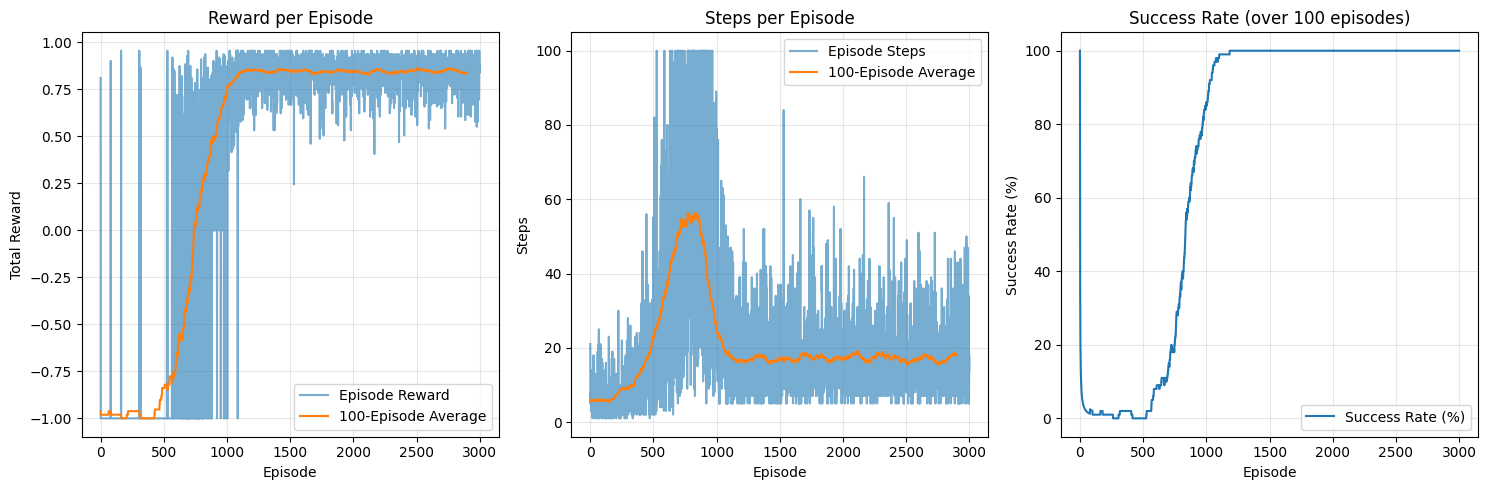

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from minigrid.wrappers import ImgObsWrapper, RGBImgObsWrapper

class SoftmaxQLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, tau=1.0, tau_min=0.1, tau_decay=0.995):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.tau = tau      # Temperature parameter for softmax
        self.tau_min = tau_min  # Minimum temperature
        self.tau_decay = tau_decay  # Temperature decay rate

        # For Dynamic-Obstacles-5x5, we need a good state representation
        self.q_table = {}
        self.num_actions = env.action_space.n

    def get_state_key(self, obs):
        """
        Create a state representation from the MiniGrid environment state.
        This is crucial for the Dynamic-Obstacles environment.
        """
        # Access the grid directly for a more meaningful state representation
        env_grid = self.env.unwrapped.grid.encode()
        agent_pos = self.env.unwrapped.agent_pos
        agent_dir = self.env.unwrapped.agent_dir

        # Create a view around the agent (3x3 grid + agent direction)
        x, y = agent_pos

        # Get surrounding cells, focusing on obstacles
        surrounding = []
        for i in range(max(0, x-1), min(x+2, self.env.unwrapped.width)):
            for j in range(max(0, y-1), min(y+2, self.env.unwrapped.height)):
                # Store cell type (0 if empty, otherwise object type)
                cell_type = env_grid[j, i, 0]  # Note: grid is indexed as [y, x]
                surrounding.append(int(cell_type))

        # Create a state representation with agent position, direction, and surrounding objects
        state_tuple = (x, y, agent_dir) + tuple(surrounding)
        return hash(state_tuple)

    def get_q_values(self, state_key):
        """Get Q-values for the state, initializing if necessary."""
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.num_actions)
        return self.q_table[state_key]

    def softmax(self, q_values):
        """Compute softmax probabilities for action selection."""
        # Prevent overflow by subtracting the maximum value
        q_values = q_values - np.max(q_values)
        exp_values = np.exp(q_values / self.tau)
        probabilities = exp_values / np.sum(exp_values)
        return probabilities

    def choose_action(self, state_key):
        """Softmax-based action selection."""
        q_values = self.get_q_values(state_key)
        probabilities = self.softmax(q_values)

        # Choose action based on the probability distribution
        action = np.random.choice(self.num_actions, p=probabilities)
        return action

    def update_q_table(self, state_key, action, reward, next_state_key, done):
        """Q-learning update rule."""
        q_values = self.get_q_values(state_key)
        next_q_values = self.get_q_values(next_state_key)

        # Q-learning update: Q(s,a) ← Q(s,a) + α[r + γ max_a' Q(s',a') - Q(s,a)]
        best_next_q = np.max(next_q_values) if not done else 0
        q_values[action] += self.alpha * (reward + self.gamma * best_next_q - q_values[action])

    def decay_temperature(self):
        """Decay the temperature parameter for softmax."""
        if self.tau > self.tau_min:
            self.tau *= self.tau_decay

def train(agent, env, episodes=3000):
    """Train the Q-learning agent with softmax exploration and return episodic rewards."""
    rewards_per_episode = []
    steps_per_episode = []
    success_rate = []

    for episode in range(episodes):
        # Reset environment
        obs, _ = env.reset()
        state_key = agent.get_state_key(obs)

        done = False
        total_reward = 0
        steps = 0
        success = False

        while not done:
            action = agent.choose_action(state_key)
            next_obs, reward, terminated, truncated, info = env.step(action)
            next_state_key = agent.get_state_key(next_obs)
            done = terminated or truncated

            # Update Q-table with the native reward
            agent.update_q_table(state_key, action, reward, next_state_key, done)

            # Update for next iteration
            state_key = next_state_key
            total_reward += reward
            steps += 1

            # Set success flag if goal reached (reward will be positive)
            if reward > 0:
                success = True

            # Enforce episode limit to prevent infinite loops during training
            # if steps >= 100:
            #     done = True

        rewards_per_episode.append(total_reward)
        steps_per_episode.append(steps)
        success_rate.append(1 if success else 0)

        # Decay temperature
        agent.decay_temperature()

        if (episode + 1) % 100 == 0:
            recent_success_rate = np.mean(success_rate[-100:]) * 100
            avg_reward = np.mean(rewards_per_episode[-100:])
            avg_steps = np.mean(steps_per_episode[-100:])
            print(f"Episode {episode+1}: Avg Reward = {avg_reward:.2f}, Avg Steps = {avg_steps:.2f}, Success Rate = {recent_success_rate:.1f}%, Tau = {agent.tau:.3f}")

    return rewards_per_episode, steps_per_episode, success_rate
env = gym.make("MiniGrid-Dynamic-Obstacles-5x5-v0", render_mode="rgb_array")

agent = SoftmaxQLearningAgent(env, alpha=0.2, gamma=0.90, tau=5, tau_min=0.01, tau_decay=0.995)

# Train the agent
print("Starting training...")
rewards, steps, successes = train(agent, env, episodes=3000)

# Plot the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(rewards, alpha=0.6, label='Episode Reward')
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'), label='100-Episode Average')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Reward per Episode')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(steps, alpha=0.6, label='Episode Steps')
plt.plot(np.convolve(steps, np.ones(100)/100, mode='valid'), label='100-Episode Average')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.title('Steps per Episode')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
window_size = 100
success_rates = [np.mean(successes[max(0, i-window_size):i])*100 if i > 0 else 0 for i in range(1, len(successes)+1)]
plt.plot(success_rates, label='Success Rate (%)')
plt.xlabel('Episode')
plt.ylabel('Success Rate (%)')
plt.title(f'Success Rate (over {window_size} episodes)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('softmax_q_learning_results.png')
plt.show()

# Test the trained agent
# test_agent(agent, env)

Action Space: Discrete(3)
Observation Space: Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), uint8), 'mission': MissionSpace(<function DynamicObstaclesEnv._gen_mission at 0x7bf56eb000e0>, None))
Starting training...
Episode 100: Avg Reward = -0.98, Avg Steps = 5.98, Success Rate = 1.0%, Tau = 0.606
Episode 200: Avg Reward = -0.94, Avg Steps = 8.52, Success Rate = 3.0%, Tau = 0.367
Episode 300: Avg Reward = -0.98, Avg Steps = 12.84, Success Rate = 1.0%, Tau = 0.222
Episode 400: Avg Reward = -0.91, Avg Steps = 19.26, Success Rate = 5.0%, Tau = 0.135
Episode 500: Avg Reward = -0.85, Avg Steps = 34.42, Success Rate = 7.0%, Tau = 0.100
Episode 600: Avg Reward = -0.66, Avg Steps = 40.72, Success Rate = 18.0%, Tau = 0.100
Episode 700: Avg Reward = -0.51, Avg Steps = 47.81, Success Rate = 24.0%, Tau = 0.100
Episode 800: Avg Reward = -0.46, Avg Steps = 44.23, Success Rate = 24.0%, Tau = 0.100
Episode 900: Avg Reward = -0.25, Avg Steps = 43.95, Success Rate = 40.0%, Tau = 0.100
Ep

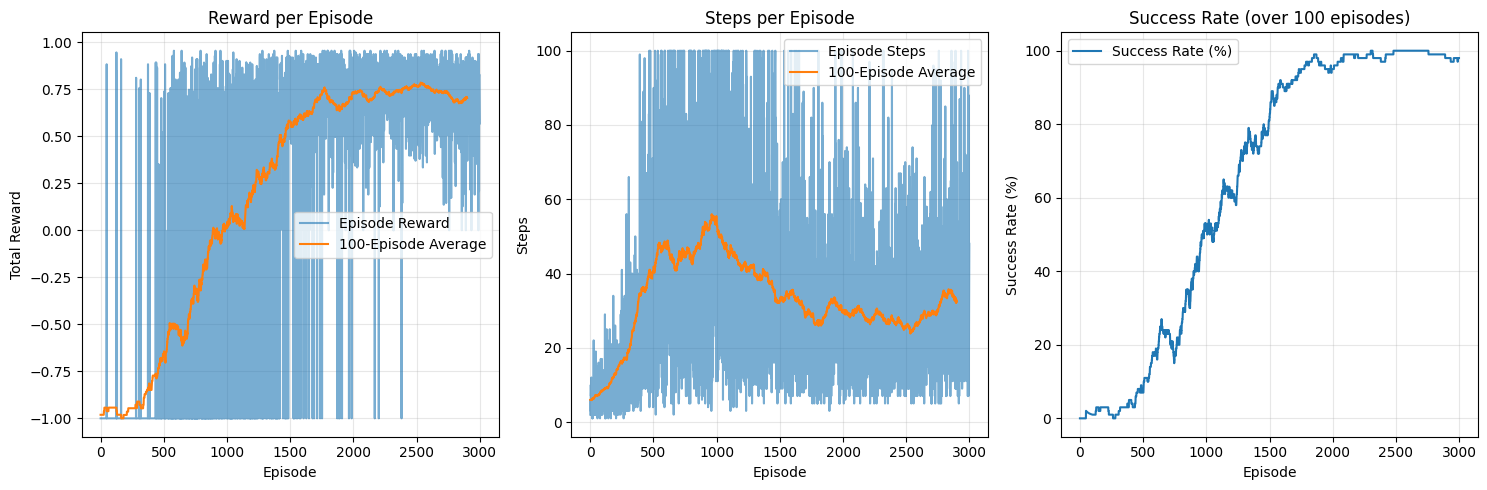


Testing the trained agent:


AttributeError: 'Q_learning_agent' object has no attribute 'get_state_key'

Starting training...
Episode 100: Success Rate = 1.0%, Epsilon = 0.183
Episode 200: Success Rate = 8.0%, Epsilon = 0.067
Episode 300: Success Rate = 40.0%, Epsilon = 0.025
Episode 400: Success Rate = 54.0%, Epsilon = 0.009
Episode 500: Success Rate = 79.0%, Epsilon = 0.005
Episode 600: Success Rate = 88.0%, Epsilon = 0.005
Episode 700: Success Rate = 84.0%, Epsilon = 0.005
Episode 800: Success Rate = 85.0%, Epsilon = 0.005
Episode 900: Success Rate = 90.0%, Epsilon = 0.005
Episode 1000: Success Rate = 92.0%, Epsilon = 0.005
Episode 1100: Success Rate = 90.0%, Epsilon = 0.005
Episode 1200: Success Rate = 98.0%, Epsilon = 0.005
Episode 1300: Success Rate = 100.0%, Epsilon = 0.005
Episode 1400: Success Rate = 96.0%, Epsilon = 0.005
Episode 1500: Success Rate = 99.0%, Epsilon = 0.005
Episode 1600: Success Rate = 98.0%, Epsilon = 0.005
Episode 1700: Success Rate = 98.0%, Epsilon = 0.005
Episode 1800: Success Rate = 97.0%, Epsilon = 0.005
Episode 1900: Success Rate = 97.0%, Epsilon = 0.005
E

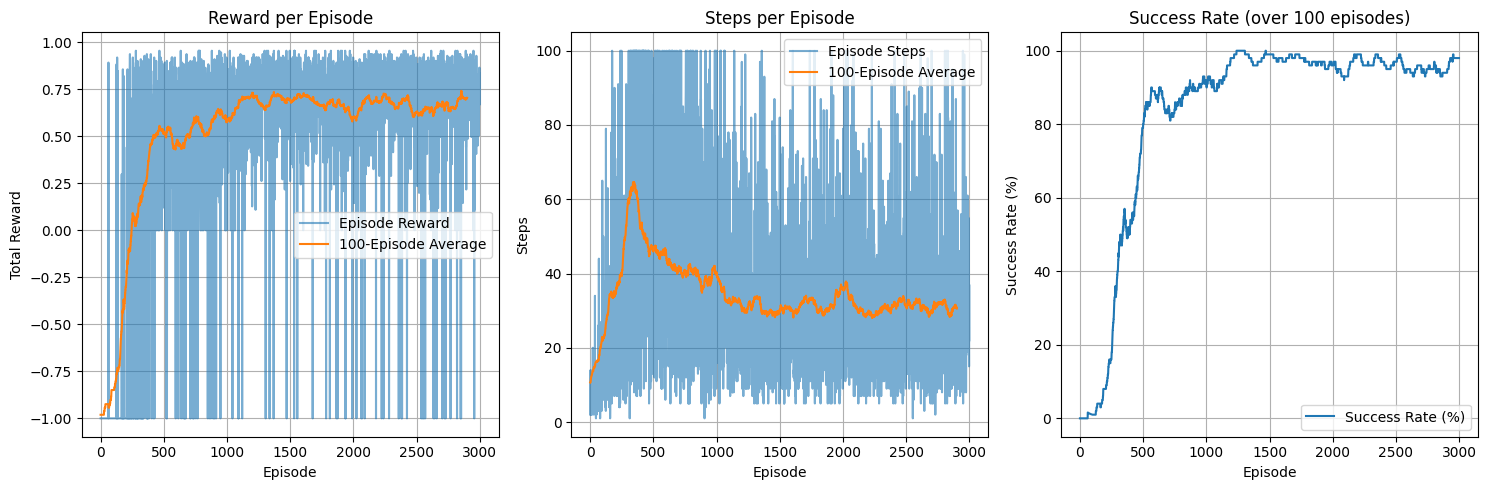

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from minigrid.wrappers import ImgObsWrapper, RGBImgObsWrapper

class SARSAAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.995):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay

        self.q_table = {}
        self.num_actions = env.action_space.n

    def get_state_key(self, obs):
        env_grid = self.env.unwrapped.grid.encode()
        agent_pos = self.env.unwrapped.agent_pos
        agent_dir = self.env.unwrapped.agent_dir

        x, y = agent_pos
        surrounding = []
        for i in range(max(0, x-1), min(x+2, self.env.unwrapped.width)):
            for j in range(max(0, y-1), min(y+2, self.env.unwrapped.height)):
                cell_type = env_grid[j, i, 0]
                surrounding.append(int(cell_type))

        state_tuple = (x, y, agent_dir) + tuple(surrounding)
        return hash(state_tuple)

    def get_q_values(self, state_key):
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.num_actions)
        return self.q_table[state_key]

    def choose_action(self, state_key):
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = self.get_q_values(state_key)
            max_q = np.max(q_values)
            actions = np.where(q_values == max_q)[0]
            return np.random.choice(actions)

    def update_q_table(self, state_key, action, reward, next_state_key, next_action, done):
        q_values = self.get_q_values(state_key)
        next_q_values = self.get_q_values(next_state_key)

        # SARSA update rule: Q(s,a) ← Q(s,a) + α [r + γ Q(s',a') - Q(s,a)]
        target = reward + (self.gamma * next_q_values[next_action] if not done else 0)
        q_values[action] += self.alpha * (target - q_values[action])

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

def train(agent, env, episodes=3000):
    rewards_per_episode = []
    steps_per_episode = []
    success_rate = []

    for episode in range(episodes):
        obs, _ = env.reset()
        state_key = agent.get_state_key(obs)
        action = agent.choose_action(state_key)

        done = False
        total_reward = 0
        steps = 0
        success = False

        while not done:
            next_obs, reward, terminated, truncated, _ = env.step(action)
            next_state_key = agent.get_state_key(next_obs)
            next_action = agent.choose_action(next_state_key)
            done = terminated or truncated

            agent.update_q_table(state_key, action, reward, next_state_key, next_action, done)

            state_key, action = next_state_key, next_action
            total_reward += reward
            steps += 1

            if reward > 0:
                success = True

            if steps >= 100:
                done = True

        rewards_per_episode.append(total_reward)
        steps_per_episode.append(steps)
        success_rate.append(1 if success else 0)
        agent.decay_epsilon()

        if (episode + 1) % 100 == 0:
            recent_success_rate = np.mean(success_rate[-100:]) * 100
            print(f"Episode {episode+1}: Success Rate = {recent_success_rate:.1f}%, Epsilon = {agent.epsilon:.3f}")

    return rewards_per_episode, steps_per_episode, success_rate

def plot_results(rewards, steps, successes):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(rewards, alpha=0.6, label='Episode Reward')
    plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'), label='100-Episode Average')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Reward per Episode')
    plt.legend()
    plt.grid()

    plt.subplot(1, 3, 2)
    plt.plot(steps, alpha=0.6, label='Episode Steps')
    plt.plot(np.convolve(steps, np.ones(100)/100, mode='valid'), label='100-Episode Average')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode')
    plt.legend()
    plt.grid()

    plt.subplot(1, 3, 3)
    window_size = 100
    success_rates = [np.mean(successes[max(0, i-window_size):i])*100 if i > 0 else 0 for i in range(1, len(successes)+1)]
    plt.plot(success_rates, label='Success Rate (%)')
    plt.xlabel('Episode')
    plt.ylabel('Success Rate (%)')
    plt.title(f'Success Rate (over {window_size} episodes)')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    # plt.savefig('sarsa_minigrid_results.png')
    plt.show()

env = gym.make("MiniGrid-Dynamic-Obstacles-5x5-v0", render_mode="rgb_array")
agent = SARSAAgent(env,alpha=0.1,gamma=0.9,epsilon=0.5,epsilon_min=0.005,epsilon_decay=0.99)

print("Starting training...")
rewards, steps, successes = train(agent, env, episodes=3000)
plot_results(rewards, steps, successes)


In [ ]:
import numpy as np

class SARSAAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.995):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # For epsilon-greedy policy
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.q_table = {}
        self.num_actions = env.action_space.n

    def get_state_key(self, obs):
        env_grid = self.env.unwrapped.grid.encode()
        agent_pos = self.env.unwrapped.agent_pos
        agent_dir = self.env.unwrapped.agent_dir
        x, y = agent_pos
        surrounding = []
        for i in range(max(0, x-1), min(x+2, self.env.unwrapped.width)):
            for j in range(max(0, y-1), min(y+2, self.env.unwrapped.height)):
                cell_type = env_grid[j, i, 0]
                surrounding.append(int(cell_type))
        state_tuple = (x, y, agent_dir) + tuple(surrounding)
        return hash(state_tuple)

    def get_q_values(self, state_key):
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.num_actions)
        return self.q_table[state_key]

    def choose_action(self, state_key):
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = self.get_q_values(state_key)
            return np.random.choice(np.flatnonzero(q_values == q_values.max()))

    def update_q_table(self, state_key, action, reward, next_state_key, next_action, done):
        q_values = self.get_q_values(state_key)
        next_q_values = self.get_q_values(next_state_key)
        target = reward + (self.gamma * next_q_values[next_action] if not done else 0)
        q_values[action] += self.alpha * (target - q_values[action])

    def decay_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)


class SoftmaxQLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, tau=1.0, tau_min=0.1, tau_decay=0.995):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.tau = tau  # Temperature parameter for softmax
        self.tau_min = tau_min  # Minimum temperature
        self.tau_decay = tau_decay  # Temperature decay rate
        self.q_table = {}
        self.num_actions = env.action_space.n

    def get_state_key(self, obs):
        env_grid = self.env.unwrapped.grid.encode()
        agent_pos = self.env.unwrapped.agent_pos
        agent_dir = self.env.unwrapped.agent_dir
        x, y = agent_pos
        surrounding = []
        for i in range(max(0, x-1), min(x+2, self.env.unwrapped.width)):
            for j in range(max(0, y-1), min(y+2, self.env.unwrapped.height)):
                cell_type = env_grid[j, i, 0]
                surrounding.append(int(cell_type))
        state_tuple = (x, y, agent_dir) + tuple(surrounding)
        return hash(state_tuple)

    def get_q_values(self, state_key):
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.num_actions)
        return self.q_table[state_key]

    def softmax(self, q_values):
        q_values = q_values - np.max(q_values)
        exp_values = np.exp(q_values / self.tau)
        return exp_values / np.sum(exp_values)

    def choose_action(self, state_key):
        probabilities = self.softmax(self.get_q_values(state_key))
        return np.random.choice(self.num_actions, p=probabilities)

    def update_q_table(self, state_key, action, reward, next_state_key, done):
        q_values = self.get_q_values(state_key)
        next_q_values = self.get_q_values(next_state_key)
        best_next_q = np.max(next_q_values) if not done else 0
        q_values[action] += self.alpha * (reward + self.gamma * best_next_q - q_values[action])

    def decay_temperature(self):
        self.tau = max(self.tau_min, self.tau * self.tau_decay)


def train(agent, env, episodes=3000):
    rewards_per_episode = []
    steps_per_episode = []
    success_rate = []
    for episode in range(episodes):
        obs, _ = env.reset()
        state_key = agent.get_state_key(obs)
        action = agent.choose_action(state_key) if isinstance(agent, SARSAAgent) else None
        done = False
        total_reward = 0
        steps = 0
        success = False
        while not done:
            next_obs, reward, terminated, truncated, _ = env.step(action) if isinstance(agent, SARSAAgent) else env.step(agent.choose_action(state_key))
            next_state_key = agent.get_state_key(next_obs)
            next_action = agent.choose_action(next_state_key) if isinstance(agent, SARSAAgent) else None
            done = terminated or truncated
            if isinstance(agent, SARSAAgent):
                agent.update_q_table(state_key, action, reward, next_state_key, next_action, done)
                state_key, action = next_state_key, next_action
            else:
                agent.update_q_table(state_key, action, reward, next_state_key, done)
                state_key = next_state_key
            total_reward += reward
            steps += 1
            if reward > 0:
                success = True
            if steps >= 100:
                done = True
        rewards_per_episode.append(total_reward)
        steps_per_episode.append(steps)
        success_rate.append(1 if success else 0)
        if isinstance(agent, SARSAAgent):
            agent.decay_epsilon()
        else:
            agent.decay_temperature()
        if (episode + 1) % 100 == 0:
            recent_success_rate = np.mean(success_rate[-100:]) * 100
            print(f"Episode {episode+1}: Success Rate = {recent_success_rate:.1f}%")
    return rewards_per_episode, steps_per_episode, success_rate


Starting training...
Episode 100: Success Rate = 2.0%
Episode 200: Success Rate = 2.0%
Episode 300: Success Rate = 7.0%
Episode 400: Success Rate = 8.0%
Episode 500: Success Rate = 26.0%
Episode 600: Success Rate = 54.0%
Episode 700: Success Rate = 63.0%
Episode 800: Success Rate = 77.0%
Episode 900: Success Rate = 84.0%
Episode 1000: Success Rate = 73.0%
Episode 1100: Success Rate = 84.0%
Episode 1200: Success Rate = 85.0%
Episode 1300: Success Rate = 80.0%
Episode 1400: Success Rate = 88.0%
Episode 1500: Success Rate = 88.0%
Episode 1600: Success Rate = 88.0%
Episode 1700: Success Rate = 81.0%
Episode 1800: Success Rate = 79.0%
Episode 1900: Success Rate = 85.0%
Episode 2000: Success Rate = 78.0%
Episode 2100: Success Rate = 87.0%
Episode 2200: Success Rate = 84.0%
Episode 2300: Success Rate = 80.0%
Episode 2400: Success Rate = 85.0%
Episode 2500: Success Rate = 87.0%
Episode 2600: Success Rate = 83.0%
Episode 2700: Success Rate = 86.0%
Episode 2800: Success Rate = 78.0%
Episode 2900

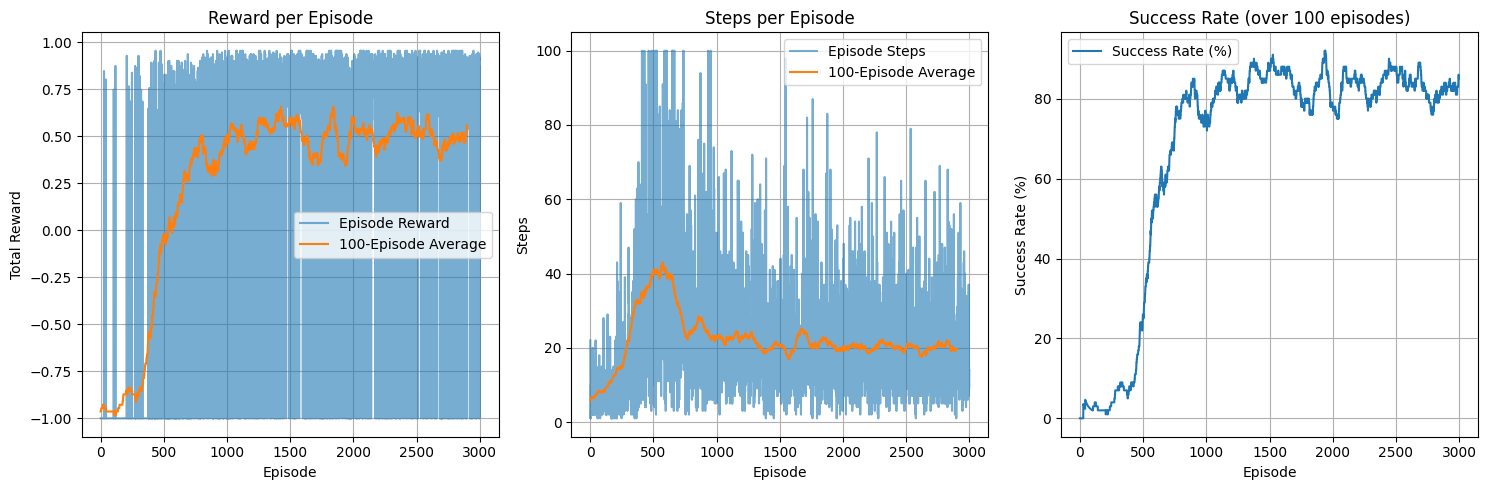

In [ ]:
env = gym.make("MiniGrid-Dynamic-Obstacles-5x5-v0", render_mode="rgb_array")
agent = SARSAAgent(env)

print("Starting training...")
rewards, steps, successes = train(agent, env, episodes=3000)
plot_results(rewards, steps, successes)

Starting training...
Episode 100: Success Rate = 0.0%
Episode 200: Success Rate = 1.0%
Episode 300: Success Rate = 1.0%
Episode 400: Success Rate = 0.0%
Episode 500: Success Rate = 0.0%
Episode 600: Success Rate = 1.0%
Episode 700: Success Rate = 0.0%
Episode 800: Success Rate = 0.0%
Episode 900: Success Rate = 0.0%
Episode 1000: Success Rate = 0.0%
Episode 1100: Success Rate = 1.0%
Episode 1200: Success Rate = 0.0%
Episode 1300: Success Rate = 2.0%
Episode 1400: Success Rate = 0.0%
Episode 1500: Success Rate = 1.0%
Episode 1600: Success Rate = 0.0%
Episode 1700: Success Rate = 1.0%
Episode 1800: Success Rate = 1.0%
Episode 1900: Success Rate = 0.0%
Episode 2000: Success Rate = 0.0%
Episode 2100: Success Rate = 0.0%
Episode 2200: Success Rate = 0.0%
Episode 2300: Success Rate = 1.0%
Episode 2400: Success Rate = 0.0%
Episode 2500: Success Rate = 0.0%
Episode 2600: Success Rate = 1.0%
Episode 2700: Success Rate = 0.0%
Episode 2800: Success Rate = 0.0%
Episode 2900: Success Rate = 0.0%
Ep

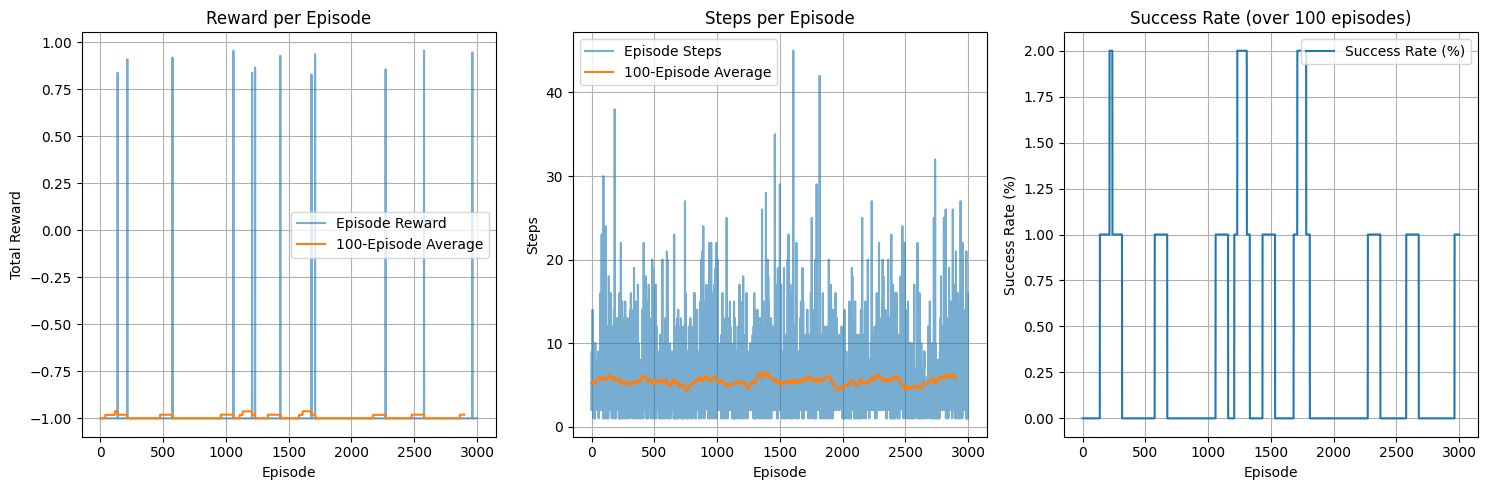

In [ ]:
env = gym.make("MiniGrid-Dynamic-Obstacles-5x5-v0", render_mode="rgb_array")
agent = SoftmaxQLearningAgent(env)

print("Starting training...")
rewards, steps, successes = train(agent, env, episodes=3000)
plot_results(rewards, steps, successes)

In [ ]:
# Create the environment
env = gym.make("MiniGrid-Dynamic-Obstacles-5x5-v0", render_mode="rgb_array")

# Print environment information for debugging
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")

# Initialize agent
agent = SoftmaxQLearningAgent(env, alpha=0.2, gamma=0.90, tau=5, tau_min=0.01, tau_decay=0.995)

# Train the agent
print("Starting training...")
rewards, steps, successes = train(agent, env, episodes=3000)

Action Space: Discrete(3)
Observation Space: Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), uint8), 'mission': MissionSpace(<function DynamicObstaclesEnv._gen_mission at 0x7e3bc8ff6020>, None))
Starting training...
Episode 100: Success Rate = 1.0%
Episode 200: Success Rate = 1.0%
Episode 300: Success Rate = 1.0%
Episode 400: Success Rate = 0.0%
Episode 500: Success Rate = 0.0%
Episode 600: Success Rate = 1.0%
Episode 700: Success Rate = 1.0%
Episode 800: Success Rate = 2.0%
Episode 900: Success Rate = 1.0%
Episode 1000: Success Rate = 0.0%
Episode 1100: Success Rate = 1.0%
Episode 1200: Success Rate = 1.0%
Episode 1300: Success Rate = 0.0%
Episode 1400: Success Rate = 0.0%
Episode 1500: Success Rate = 0.0%
Episode 1600: Success Rate = 0.0%
Episode 1700: Success Rate = 0.0%
Episode 1800: Success Rate = 0.0%
Episode 1900: Success Rate = 1.0%
Episode 2000: Success Rate = 1.0%
Episode 2100: Success Rate = 0.0%
Episode 2200: Success Rate = 0.0%
Episode 2300: Success Rate = 0

In [ ]:
!pip install gymnasium minigrid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.7/136.7 kB 2.8 MB/s eta 0:00:00


Starting Q learning...
Episode 100: Avg Reward = -0.98, Avg Steps = 5.54, Success Rate = 1.0%, Tau = 3.029
Episode 200: Avg Reward = -0.95, Avg Steps = 6.25, Success Rate = 3.0%, Tau = 1.835
Episode 300: Avg Reward = -0.96, Avg Steps = 7.02, Success Rate = 2.0%, Tau = 1.111
Episode 400: Avg Reward = -1.00, Avg Steps = 8.38, Success Rate = 0.0%, Tau = 0.673
Episode 500: Avg Reward = -0.95, Avg Steps = 13.21, Success Rate = 3.0%, Tau = 0.408
Episode 600: Avg Reward = -0.94, Avg Steps = 22.69, Success Rate = 3.0%, Tau = 0.247
Episode 700: Avg Reward = -0.73, Avg Steps = 35.74, Success Rate = 14.0%, Tau = 0.150
Episode 800: Avg Reward = -0.25, Avg Steps = 50.01, Success Rate = 43.0%, Tau = 0.091
Episode 900: Avg Reward = 0.17, Avg Steps = 51.60, Success Rate = 61.0%, Tau = 0.055
Episode 1000: Avg Reward = 0.57, Avg Steps = 42.50, Success Rate = 90.0%, Tau = 0.033
Episode 1100: Avg Reward = 0.78, Avg Steps = 24.07, Success Rate = 100.0%, Tau = 0.020
Episode 1200: Avg Reward = 0.82, Avg Step

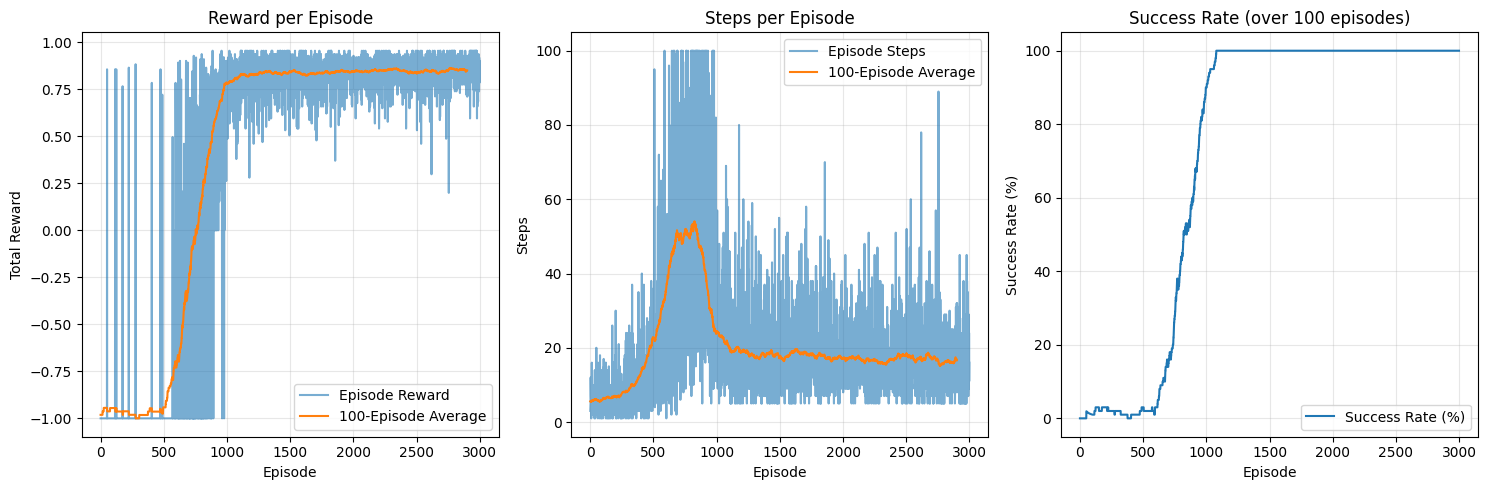

Starting training...
Episode 100: Success Rate = 0.0%, Epsilon = 0.183
Episode 200: Success Rate = 7.0%, Epsilon = 0.067
Episode 300: Success Rate = 23.0%, Epsilon = 0.025
Episode 400: Success Rate = 83.0%, Epsilon = 0.009
Episode 500: Success Rate = 90.0%, Epsilon = 0.005
Episode 600: Success Rate = 92.0%, Epsilon = 0.005
Episode 700: Success Rate = 96.0%, Epsilon = 0.005
Episode 800: Success Rate = 98.0%, Epsilon = 0.005
Episode 900: Success Rate = 97.0%, Epsilon = 0.005
Episode 1000: Success Rate = 96.0%, Epsilon = 0.005
Episode 1100: Success Rate = 95.0%, Epsilon = 0.005
Episode 1200: Success Rate = 96.0%, Epsilon = 0.005
Episode 1300: Success Rate = 96.0%, Epsilon = 0.005
Episode 1400: Success Rate = 94.0%, Epsilon = 0.005
Episode 1500: Success Rate = 99.0%, Epsilon = 0.005
Episode 1600: Success Rate = 96.0%, Epsilon = 0.005
Episode 1700: Success Rate = 99.0%, Epsilon = 0.005
Episode 1800: Success Rate = 97.0%, Epsilon = 0.005
Episode 1900: Success Rate = 95.0%, Epsilon = 0.005
Ep

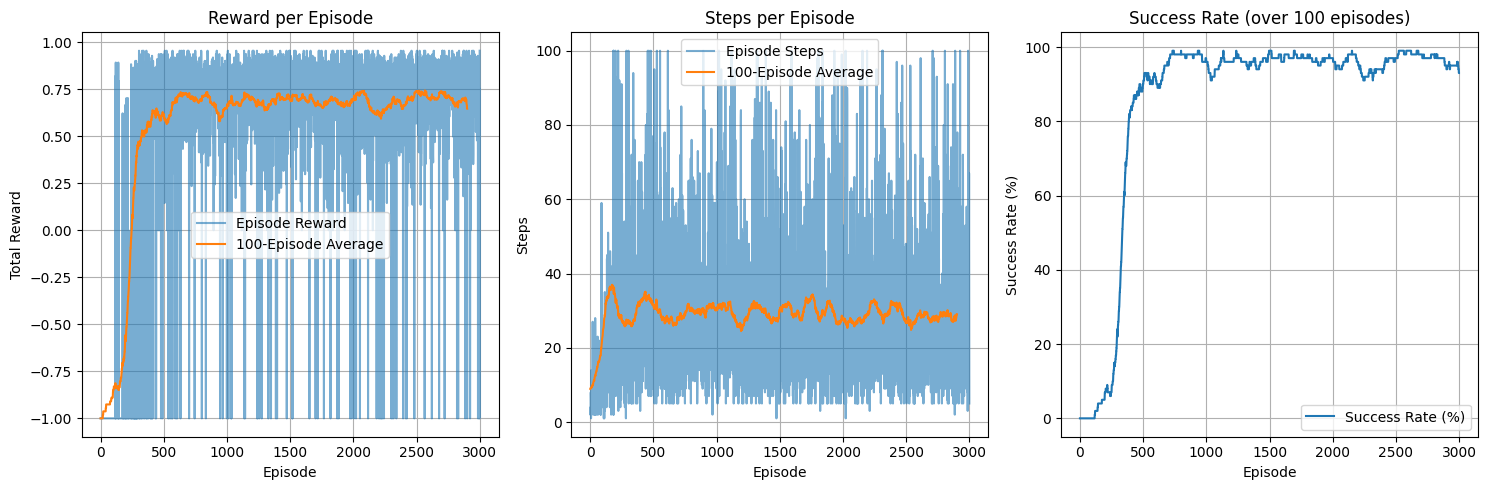

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from minigrid.wrappers import ImgObsWrapper, RGBImgObsWrapper

class SoftmaxQLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, tau=1.0, tau_min=0.1, tau_decay=0.995):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.tau = tau
        self.tau_min = tau_min
        self.tau_decay = tau_decay
        self.q_table = {}
        self.num_actions = env.action_space.n

    def get_state_key(self, obs):
        env_grid = self.env.unwrapped.grid.encode()
        agent_pos = self.env.unwrapped.agent_pos
        agent_dir = self.env.unwrapped.agent_dir
        x, y = agent_pos
        surrounding = []
        for i in range(max(0, x-1), min(x+2, self.env.unwrapped.width)):
            for j in range(max(0, y-1), min(y+2, self.env.unwrapped.height)):
                cell_type = env_grid[j, i, 0]
                surrounding.append(int(cell_type))

        state_tuple = (x, y, agent_dir) + tuple(surrounding)
        return hash(state_tuple)

    def get_q_values(self, state_key):
        """Get Q-values for the state, initializing if necessary."""
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.num_actions)
        return self.q_table[state_key]

    def softmax(self, q_values):
        q_values = q_values - np.max(q_values)
        exp_values = np.exp(q_values / self.tau)
        probabilities = exp_values / np.sum(exp_values)
        return probabilities

    def choose_action(self, state_key):
        """Softmax-based action selection."""
        q_values = self.get_q_values(state_key)
        probabilities = self.softmax(q_values)
        action = np.random.choice(self.num_actions, p=probabilities)
        return action

    def update_q_table(self, state_key, action, reward, next_state_key, done):
        """Q-learning update rule."""
        q_values = self.get_q_values(state_key)
        next_q_values = self.get_q_values(next_state_key)
        best_next_q = np.max(next_q_values) if not done else 0
        q_values[action] += self.alpha * (reward + self.gamma * best_next_q - q_values[action])

    def decay_temperature(self):
        if self.tau > self.tau_min:
            self.tau *= self.tau_decay

def train(agent, env, episodes=3000):
    rewards_per_episode = []
    steps_per_episode = []
    success_rate = []

    for episode in range(episodes):
        # Reset environment
        obs, _ = env.reset()
        state_key = agent.get_state_key(obs)

        done = False
        total_reward = 0
        steps = 0
        success = False

        while not done:
            action = agent.choose_action(state_key)
            next_obs, reward, terminated, truncated, info = env.step(action)
            next_state_key = agent.get_state_key(next_obs)
            done = terminated or truncated
            agent.update_q_table(state_key, action, reward, next_state_key, done)
            state_key = next_state_key
            total_reward += reward
            steps += 1

            if reward > 0:
                success = True

        rewards_per_episode.append(total_reward)
        steps_per_episode.append(steps)
        success_rate.append(1 if success else 0)

        # Decay temperature
        agent.decay_temperature()

        if (episode + 1) % 100 == 0:
            recent_success_rate = np.mean(success_rate[-100:]) * 100
            avg_reward = np.mean(rewards_per_episode[-100:])
            avg_steps = np.mean(steps_per_episode[-100:])
            print(f"Episode {episode+1}: Avg Reward = {avg_reward:.2f}, Avg Steps = {avg_steps:.2f}, Success Rate = {recent_success_rate:.1f}%, Tau = {agent.tau:.3f}")

    return rewards_per_episode, steps_per_episode, success_rate
env = gym.make("MiniGrid-Dynamic-Obstacles-5x5-v0", render_mode="rgb_array")

agent = SoftmaxQLearningAgent(env, alpha=0.2, gamma=0.90, tau=5, tau_min=0.01, tau_decay=0.995)

print("Starting Q learning...")
rewards, steps, successes = train(agent, env, episodes=3000)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(rewards, alpha=0.6, label='Episode Reward')
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'), label='100-Episode Average')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Reward per Episode')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(steps, alpha=0.6, label='Episode Steps')
plt.plot(np.convolve(steps, np.ones(100)/100, mode='valid'), label='100-Episode Average')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.title('Steps per Episode')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
window_size = 100
success_rates = [np.mean(successes[max(0, i-window_size):i])*100 if i > 0 else 0 for i in range(1, len(successes)+1)]
plt.plot(success_rates, label='Success Rate (%)')
plt.xlabel('Episode')
plt.ylabel('Success Rate (%)')
plt.title(f'Success Rate (over {window_size} episodes)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from minigrid.wrappers import ImgObsWrapper, RGBImgObsWrapper

class SARSAAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.995):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay

        self.q_table = {}
        self.num_actions = env.action_space.n

    def get_state_key(self, obs):
        env_grid = self.env.unwrapped.grid.encode()
        agent_pos = self.env.unwrapped.agent_pos
        agent_dir = self.env.unwrapped.agent_dir

        x, y = agent_pos
        surrounding = []
        for i in range(max(0, x-1), min(x+2, self.env.unwrapped.width)):
            for j in range(max(0, y-1), min(y+2, self.env.unwrapped.height)):
                cell_type = env_grid[j, i, 0]
                surrounding.append(int(cell_type))

        state_tuple = (x, y, agent_dir) + tuple(surrounding)
        return hash(state_tuple)

    def get_q_values(self, state_key):
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.num_actions)
        return self.q_table[state_key]

    def choose_action(self, state_key):
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = self.get_q_values(state_key)
            max_q = np.max(q_values)
            actions = np.where(q_values == max_q)[0]
            return np.random.choice(actions)

    def update_q_table(self, state_key, action, reward, next_state_key, next_action, done):
        q_values = self.get_q_values(state_key)
        next_q_values = self.get_q_values(next_state_key)

        # SARSA update rule: Q(s,a) ← Q(s,a) + α [r + γ Q(s',a') - Q(s,a)]
        target = reward + (self.gamma * next_q_values[next_action] if not done else 0)
        q_values[action] += self.alpha * (target - q_values[action])

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

def train(agent, env, episodes=3000,num_runs=5):
    rewards_per_episode = []
    steps_per_episode = []
    success_rate = []

    for run in range(num_runs):
      np.random.seed(run)
      for episode in range(episodes):
          obs, _ = env.reset()
          state_key = agent.get_state_key(obs)
          action = agent.choose_action(state_key)

          done = False
          total_reward = 0
          steps = 0
          success = False
          while not done:
              next_obs, reward, terminated, truncated, _ = env.step(action)
              next_state_key = agent.get_state_key(next_obs)
              next_action = agent.choose_action(next_state_key)
              done = terminated or truncated

              agent.update_q_table(state_key, action, reward, next_state_key, next_action, done)

              state_key, action = next_state_key, next_action
              total_reward += reward
              steps += 1

              if reward > 0:
                  success = True

              if steps >= 100:
                  done = True

          rewards_per_episode.append(total_reward)
          steps_per_episode.append(steps)
          success_rate.append(1 if success else 0)
          agent.decay_epsilon()

          if (episode + 1) % 100 == 0:
              recent_success_rate = np.mean(success_rate[-100:]) * 100
              print(f"Episode {episode+1}: Success Rate = {recent_success_rate:.1f}%, Epsilon = {agent.epsilon:.3f}")

    return rewards_per_episode, steps_per_episode, success_rate

def plot_results(rewards, steps, successes):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(rewards, alpha=0.6, label='Episode Reward')
    plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'), label='100-Episode Average')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Reward per Episode')
    plt.legend()
    plt.grid()

    plt.subplot(1, 3, 2)
    plt.plot(steps, alpha=0.6, label='Episode Steps')
    plt.plot(np.convolve(steps, np.ones(100)/100, mode='valid'), label='100-Episode Average')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode')
    plt.legend()
    plt.grid()

    plt.subplot(1, 3, 3)
    window_size = 100
    success_rates = [np.mean(successes[max(0, i-window_size):i])*100 if i > 0 else 0 for i in range(1, len(successes)+1)]
    plt.plot(success_rates, label='Success Rate (%)')
    plt.xlabel('Episode')
    plt.ylabel('Success Rate (%)')
    plt.title(f'Success Rate (over {window_size} episodes)')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    # plt.savefig('sarsa_minigrid_results.png')
    plt.show()

env = gym.make("MiniGrid-Dynamic-Obstacles-5x5-v0", render_mode="rgb_array")
agent = SARSAAgent(env,alpha=0.1,gamma=0.9,epsilon=0.5,epsilon_min=0.005,epsilon_decay=0.99)

print("Starting training...")
rewards, steps, successes = train(agent, env, episodes=3000)
plot_results(rewards, steps, successes)


In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from minigrid.wrappers import ImgObsWrapper, RGBImgObsWrapper

class SARSAAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.995):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay

        self.q_table = {}
        self.num_actions = env.action_space.n

    def get_state_key(self, obs):
        env_grid = self.env.unwrapped.grid.encode()
        agent_pos = self.env.unwrapped.agent_pos
        agent_dir = self.env.unwrapped.agent_dir

        x, y = agent_pos
        surrounding = []
        for i in range(max(0, x-1), min(x+2, self.env.unwrapped.width)):
            for j in range(max(0, y-1), min(y+2, self.env.unwrapped.height)):
                cell_type = env_grid[j, i, 0]
                surrounding.append(int(cell_type))

        state_tuple = (x, y, agent_dir) + tuple(surrounding)
        return hash(state_tuple)

    def get_q_values(self, state_key):
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.num_actions)
        return self.q_table[state_key]

    def choose_action(self, state_key):
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = self.get_q_values(state_key)
            max_q = np.max(q_values)
            actions = np.where(q_values == max_q)[0]
            return np.random.choice(actions)

    def update_q_table(self, state_key, action, reward, next_state_key, next_action, done):
        q_values = self.get_q_values(state_key)
        next_q_values = self.get_q_values(next_state_key)

        target = reward + (self.gamma * next_q_values[next_action] if not done else 0)
        q_values[action] += self.alpha * (target - q_values[action])

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
def train_sarsa(agent_class, env,alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.995, episodes=3000, num_runs=5):
    all_rewards = np.zeros((num_runs, episodes))
    all_steps = np.zeros((num_runs, episodes))
    all_success_rates = np.zeros((num_runs, episodes))

    for run in range(num_runs):
        print(f"Starting run {run+1}/{num_runs}...")
        agent = agent_class(env,alpha=alpha, gamma=gamma, epsilon=epsilon, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay)
        np.random.seed(run)

        rewards_per_episode = np.zeros(episodes)
        steps_per_episode = np.zeros(episodes)
        success_per_episode = np.zeros(episodes)

        for episode in range(episodes):
            obs, _ = env.reset()
            state_key = agent.get_state_key(obs)
            action = agent.choose_action(state_key)

            done = False
            total_reward = 0
            steps = 0
            success = False

            while not done:
                next_obs, reward, terminated, truncated, _ = env.step(action)
                next_state_key = agent.get_state_key(next_obs)
                next_action = agent.choose_action(next_state_key)
                done = terminated or truncated

                agent.update_q_table(state_key, action, reward, next_state_key, next_action, done)

                state_key, action = next_state_key, next_action
                total_reward += reward
                steps += 1

                if reward > 0:  # Assuming success is defined as receiving positive reward
                    success = True

            rewards_per_episode[episode] = total_reward
            steps_per_episode[episode] = steps
            success_per_episode[episode] = 1 if success else 0
            agent.decay_epsilon()

            # Print stats every 100 episodes
            if (episode + 1) % 100 == 0:
                avg_recent_success = np.mean(success_per_episode[max(0, episode - 99):episode + 1]) * 100
                print(f"Run {run+1}, Episode {episode+1}: Avg Success Rate = {avg_recent_success:.1f}%, Epsilon = {agent.epsilon:.3f}")

        all_rewards[run] = rewards_per_episode
        all_steps[run] = steps_per_episode
        all_success_rates[run] = success_per_episode

    avg_rewards = np.mean(all_rewards, axis=0)
    std_rewards = np.std(all_rewards, axis=0)
    avg_steps = np.mean(all_steps, axis=0)
    std_steps = np.std(all_steps, axis=0)
    avg_success_rate = np.mean(all_success_rates, axis=0)
    std_success_rate = np.std(all_success_rates, axis=0)

    return avg_rewards, std_rewards, avg_steps, std_steps, avg_success_rate, std_success_rate


env = gym.make("MiniGrid-Dynamic-Obstacles-5x5-v0", render_mode="rgb_array")
sarsa_avg_rewards, sarsa_std_rewards, sarsa_avg_steps, sarsa_std_steps, sarsa_avg_success_rate, sarsa_std_success_rate=train_sarsa(SARSAAgent,env)

In [ ]:


env = gym.make("MiniGrid-Dynamic-Obstacles-5x5-v0", render_mode="rgb_array")
sarsa_avg_rewards, sarsa_std_rewards, sarsa_avg_steps, sarsa_std_steps, sarsa_avg_success_rate, sarsa_std_success_rate=train_sarsa(SARSAAgent,env)

Starting run 1/5...
Run 1, Episode 100: Avg Success Rate = 0.0%, Epsilon = 0.606
Run 1, Episode 200: Avg Success Rate = 4.0%, Epsilon = 0.367
Run 1, Episode 300: Avg Success Rate = 10.0%, Epsilon = 0.222
Run 1, Episode 400: Avg Success Rate = 15.0%, Epsilon = 0.135
Run 1, Episode 500: Avg Success Rate = 32.0%, Epsilon = 0.082
Run 1, Episode 600: Avg Success Rate = 62.0%, Epsilon = 0.050
Run 1, Episode 700: Avg Success Rate = 74.0%, Epsilon = 0.050
Run 1, Episode 800: Avg Success Rate = 79.0%, Epsilon = 0.050
Run 1, Episode 900: Avg Success Rate = 79.0%, Epsilon = 0.050
Run 1, Episode 1000: Avg Success Rate = 74.0%, Epsilon = 0.050
Run 1, Episode 1100: Avg Success Rate = 76.0%, Epsilon = 0.050
Run 1, Episode 1200: Avg Success Rate = 89.0%, Epsilon = 0.050
Run 1, Episode 1300: Avg Success Rate = 83.0%, Epsilon = 0.050
Run 1, Episode 1400: Avg Success Rate = 82.0%, Epsilon = 0.050
Run 1, Episode 1500: Avg Success Rate = 81.0%, Epsilon = 0.050
Run 1, Episode 1600: Avg Success Rate = 86.0%,

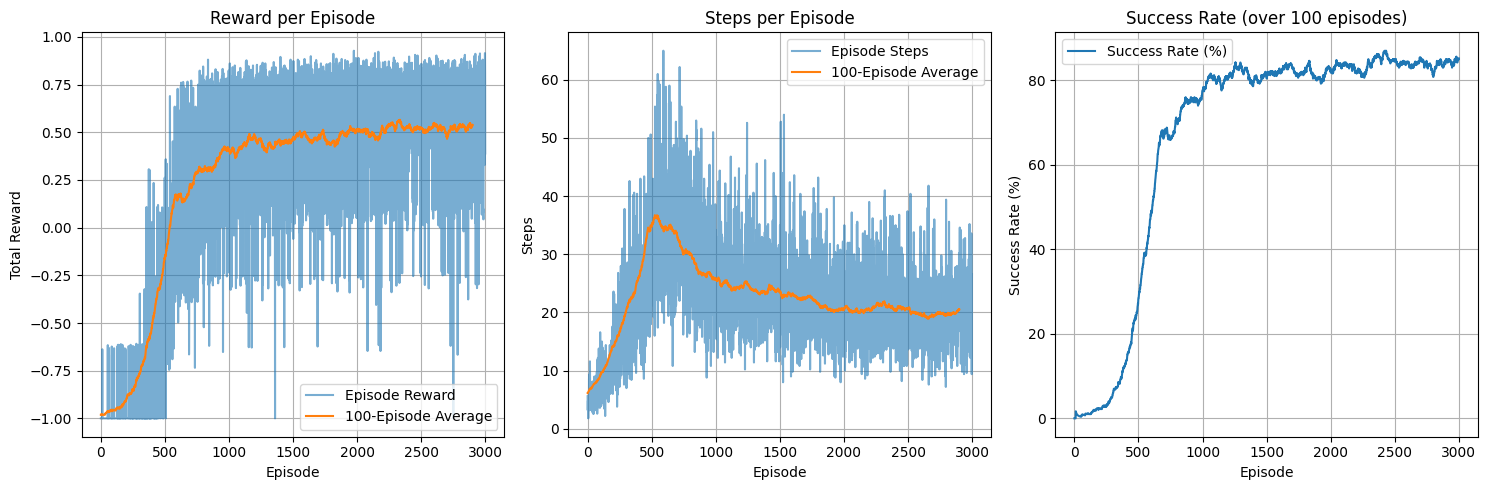

In [ ]:

def plot_results(rewards, steps, successes):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(rewards, alpha=0.6, label='Episode Reward')
    plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'), label='100-Episode Average')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Reward per Episode')
    plt.legend()
    plt.grid()

    plt.subplot(1, 3, 2)
    plt.plot(steps, alpha=0.6, label='Episode Steps')
    plt.plot(np.convolve(steps, np.ones(100)/100, mode='valid'), label='100-Episode Average')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode')
    plt.legend()
    plt.grid()

    plt.subplot(1, 3, 3)
    window_size = 100
    success_rates = [np.mean(successes[max(0, i-window_size):i])*100 if i > 0 else 0 for i in range(1, len(successes)+1)]
    plt.plot(success_rates, label='Success Rate (%)')
    plt.xlabel('Episode')
    plt.ylabel('Success Rate (%)')
    plt.title(f'Success Rate (over {window_size} episodes)')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    # plt.savefig('sarsa_minigrid_results.png')
    plt.show()
plot_results(avg_rewards, avg_steps, avg_success_rate)

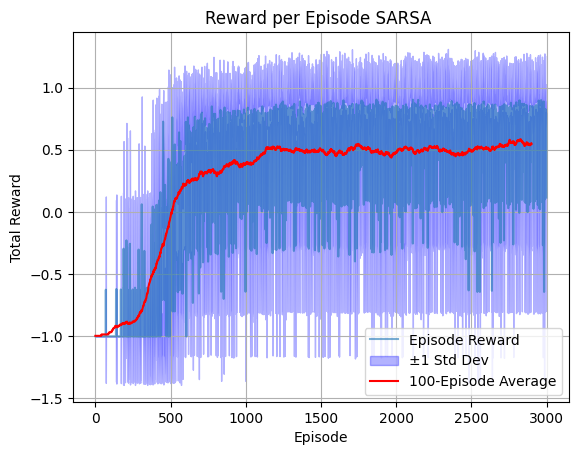

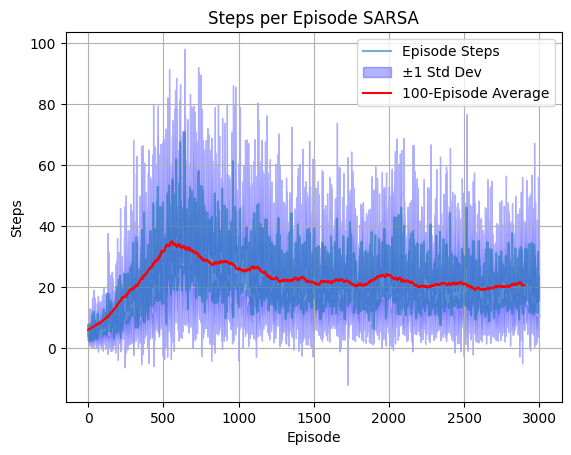

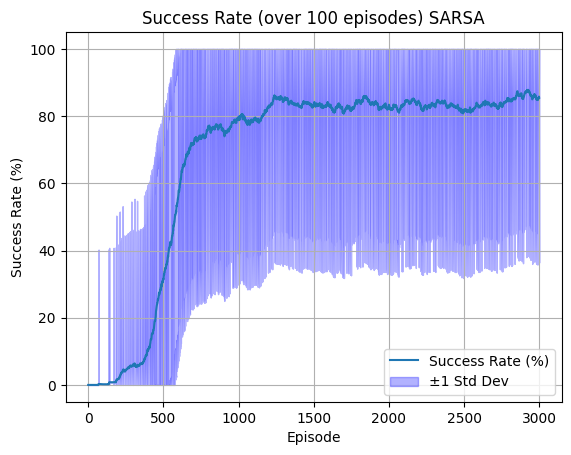

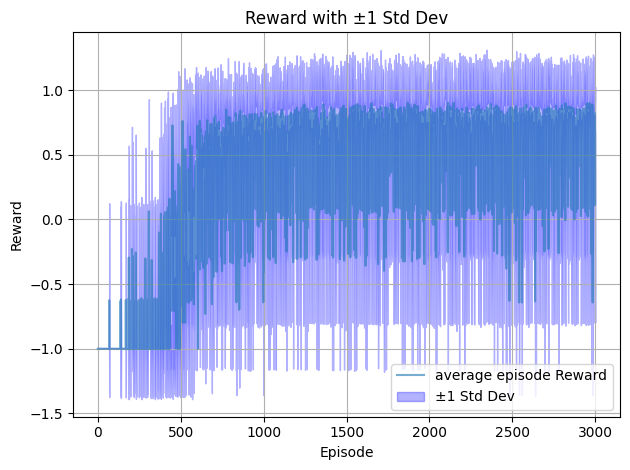

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_results(rewards, std_rewards, steps, std_steps, successes, std_successes,algorithm):
    # plt.figure(figsize=(20, 5))

    # Reward per Episode with ±1 Std Dev
    # plt.subplot(1, 4, 1)
    plt.plot(rewards, alpha=0.6, label='Episode Reward')
    plt.fill_between(range(len(rewards)), rewards - std_rewards, rewards + std_rewards, alpha=0.3, color='b', label='±1 Std Dev')
    plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'), label='100-Episode Average', color='r')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title(f'Reward per Episode {algorithm} ')
    plt.legend()
    plt.grid()
    plt.savefig("Rewards")
    plt.show()


    # Steps per Episode
    # plt.subplot(1, 4, 2)
    plt.plot(steps, alpha=0.6, label='Episode Steps')
    plt.fill_between(range(len(steps)), steps - std_steps, steps + std_steps, alpha=0.3, color='b', label='±1 Std Dev')
    plt.plot(np.convolve(steps, np.ones(100)/100, mode='valid'), label='100-Episode Average', color='r')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title(f'Steps per Episode {algorithm}')
    plt.legend()
    plt.grid()
    plt.savefig("Steps")
    plt.show()

    # Success Rate
    # plt.subplot(1, 4, 3)
    window_size = 100
    success_rates = [np.mean(successes[max(0, i-window_size):i]) * 100 if i > 0 else 0 for i in range(1, len(successes)+1)]
    plt.plot(success_rates, label='Success Rate (%)')
    plt.fill_between(range(len(success_rates)),
                     np.maximum(0, success_rates - std_successes[:len(success_rates)] * 100),
                     np.minimum(100, success_rates + std_successes[:len(success_rates)] * 100),
                     alpha=0.3, color='b', label='±1 Std Dev')
    plt.xlabel('Episode')
    plt.ylabel('Success Rate (%)')
    plt.title(f'Success Rate (over {window_size} episodes) {algorithm}')
    plt.legend()
    plt.grid()
    plt.savefig("success_rate")
    plt.show()

    # Reward with ±1 Std Dev
    # plt.subplot(1, 4, 4)
    plt.plot(rewards, label='average episode Reward', alpha=0.6)
    plt.fill_between(range(len(rewards)), rewards - std_rewards, rewards + std_rewards, alpha=0.3, color='b', label='±1 Std Dev')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Reward with ±1 Std Dev')
    plt.legend()
    plt.grid()
    plt.savefig("Reward_std_dev")
    plt.tight_layout()
    plt.show()

# Call function with averaged results
plot_results(sarsa_avg_rewards, sarsa_std_rewards, sarsa_avg_steps, sarsa_std_steps, sarsa_avg_success_rate, sarsa_std_success_rate,algorithm="SARSA")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from minigrid.wrappers import ImgObsWrapper, RGBImgObsWrapper

class SoftmaxQLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, tau=1.0, tau_min=0.1, tau_decay=0.995):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.tau = tau
        self.tau_min = tau_min
        self.tau_decay = tau_decay
        self.q_table = {}
        self.num_actions = env.action_space.n

    def get_state_key(self, obs):
        env_grid = self.env.unwrapped.grid.encode()
        agent_pos = self.env.unwrapped.agent_pos
        agent_dir = self.env.unwrapped.agent_dir
        x, y = agent_pos
        surrounding = []
        for i in range(max(0, x-1), min(x+2, self.env.unwrapped.width)):
            for j in range(max(0, y-1), min(y+2, self.env.unwrapped.height)):
                cell_type = env_grid[j, i, 0]
                surrounding.append(int(cell_type))

        state_tuple = (x, y, agent_dir) + tuple(surrounding)
        return hash(state_tuple)

    def get_q_values(self, state_key):
        """Get Q-values for the state, initializing if necessary."""
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.num_actions)
        return self.q_table[state_key]

    def softmax(self, q_values):
        q_values = q_values - np.max(q_values)
        exp_values = np.exp(q_values / self.tau)
        probabilities = exp_values / np.sum(exp_values)
        return probabilities

    def choose_action(self, state_key):
        """Softmax-based action selection."""
        q_values = self.get_q_values(state_key)
        probabilities = self.softmax(q_values)
        action = np.random.choice(self.num_actions, p=probabilities)
        return action

    def update_q_table(self, state_key, action, reward, next_state_key, done):
        """Q-learning update rule."""
        q_values = self.get_q_values(state_key)
        next_q_values = self.get_q_values(next_state_key)
        best_next_q = np.max(next_q_values) if not done else 0
        q_values[action] += self.alpha * (reward + self.gamma * best_next_q - q_values[action])

    def decay_temperature(self):
        if self.tau > self.tau_min:
            self.tau *= self.tau_decay

import numpy as np

def train_q_learning(agent_class, env, episodes=3000, num_runs=5):
    all_rewards = np.zeros((num_runs, episodes))
    all_steps = np.zeros((num_runs, episodes))
    all_successes = np.zeros((num_runs, episodes))

    for run in range(num_runs):
        print(f"Starting run {run+1}/{num_runs}...")
        agent = agent_class(env)
        np.random.seed(run)

        rewards_per_episode = np.zeros(episodes)
        steps_per_episode = np.zeros(episodes)
        success_rate = np.zeros(episodes)

        for episode in range(episodes):
            obs, _ = env.reset()
            state_key = agent.get_state_key(obs)

            done = False
            total_reward = 0
            steps = 0
            success = False

            while not done:
                action = agent.choose_action(state_key)
                next_obs, reward, terminated, truncated, info = env.step(action)
                next_state_key = agent.get_state_key(next_obs)
                done = terminated or truncated
                agent.update_q_table(state_key, action, reward, next_state_key, done)
                state_key = next_state_key
                total_reward += reward
                steps += 1

                if reward > 0:
                    success = True

            rewards_per_episode[episode] = total_reward
            steps_per_episode[episode] = steps
            success_rate[episode] = 1 if success else 0

            # Decay temperature
            agent.decay_temperature()

            if (episode + 1) % 100 == 0:
                recent_success_rate = np.mean(success_rate[max(0, episode-99):episode+1]) * 100
                avg_reward = np.mean(rewards_per_episode[max(0, episode-99):episode+1])
                avg_steps = np.mean(steps_per_episode[max(0, episode-99):episode+1])
                print(f"Run {run+1}, Episode {episode+1}: Avg Reward = {avg_reward:.2f}, Avg Steps = {avg_steps:.2f}, Success Rate = {recent_success_rate:.1f}%, Tau = {agent.tau:.3f}")

        all_rewards[run] = rewards_per_episode
        all_steps[run] = steps_per_episode
        all_successes[run] = success_rate

    avg_rewards = np.mean(all_rewards, axis=0)
    std_rewards = np.std(all_rewards, axis=0)
    avg_steps = np.mean(all_steps, axis=0)
    std_steps = np.std(all_steps, axis=0)
    avg_success_rate = np.mean(all_successes, axis=0)
    std_success_rate = np.std(all_successes, axis=0)

    return avg_rewards, std_rewards, avg_steps, std_steps, avg_success_rate, std_success_rate


env = gym.make("MiniGrid-Dynamic-Obstacles-5x5-v0", render_mode="rgb_array")

agent = SoftmaxQLearningAgent(env, alpha=0.2, gamma=0.90, tau=5, tau_min=0.01, tau_decay=0.995)

print("Starting Q learning...")
Q_avg_rewards, Q_std_rewards, Q_avg_steps, Q_std_steps, Q_avg_success_rate, Q_std_success_rate = train_q_learning(SoftmaxQLearningAgent, env, episodes=2000)

Starting Q learning...
Starting run 1/5...
Run 1, Episode 100: Avg Reward = -0.96, Avg Steps = 6.20, Success Rate = 2.0%, Tau = 0.606
Run 1, Episode 200: Avg Reward = -0.98, Avg Steps = 7.78, Success Rate = 1.0%, Tau = 0.367
Run 1, Episode 300: Avg Reward = -0.94, Avg Steps = 12.76, Success Rate = 3.0%, Tau = 0.222
Run 1, Episode 400: Avg Reward = -0.82, Avg Steps = 26.55, Success Rate = 9.0%, Tau = 0.135
Run 1, Episode 500: Avg Reward = -0.72, Avg Steps = 38.16, Success Rate = 11.0%, Tau = 0.100
Run 1, Episode 600: Avg Reward = -0.68, Avg Steps = 39.78, Success Rate = 17.0%, Tau = 0.100
Run 1, Episode 700: Avg Reward = -0.65, Avg Steps = 50.04, Success Rate = 11.0%, Tau = 0.100
Run 1, Episode 800: Avg Reward = -0.38, Avg Steps = 42.72, Success Rate = 31.0%, Tau = 0.100
Run 1, Episode 900: Avg Reward = -0.26, Avg Steps = 49.44, Success Rate = 38.0%, Tau = 0.100
Run 1, Episode 1000: Avg Reward = 0.02, Avg Steps = 49.72, Success Rate = 58.0%, Tau = 0.100
Run 1, Episode 1100: Avg Reward =

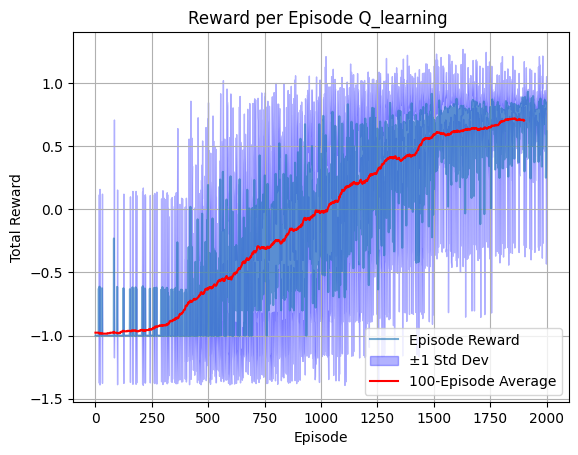

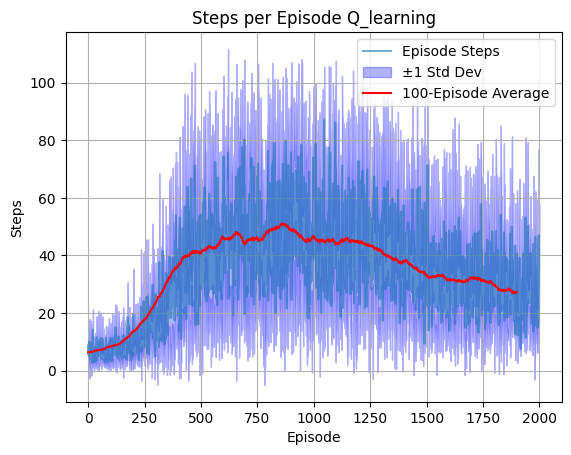

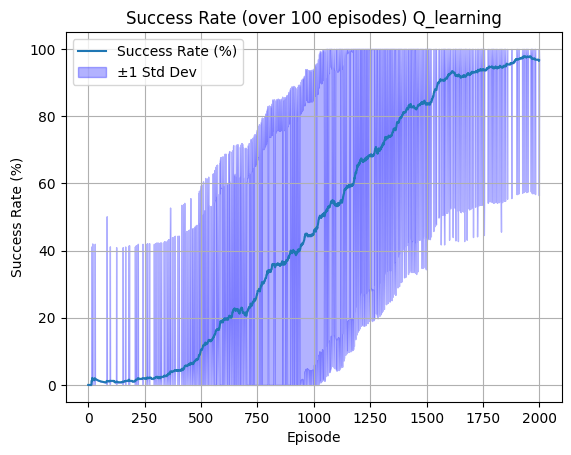

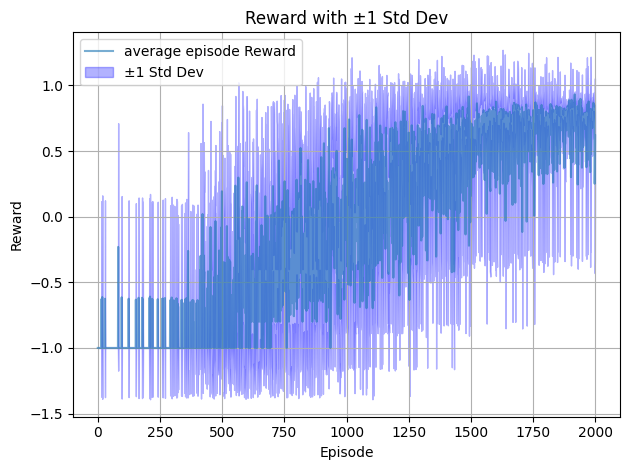

In [ ]:

plot_results(Q_avg_rewards, Q_std_rewards, Q_avg_steps, Q_std_steps, Q_avg_success_rate, Q_std_success_rate,algorithm="Q_learning")


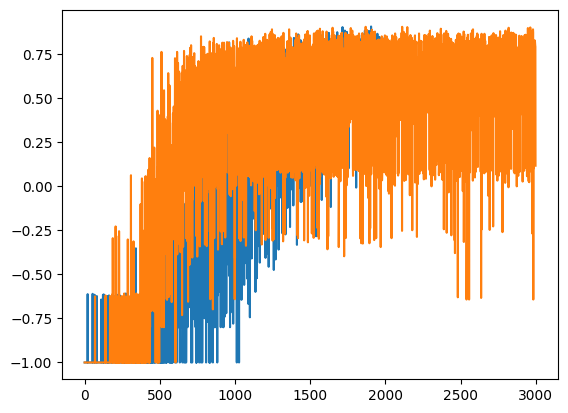

In [ ]:
plt.plot(Q_avg_rewards, label='Q-Learning Average Reward')
plt.plot(sarsa_avg_rewards, label='SARSA Average Reward')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Comparison of Average Rewards between Q-Learning and SARSA')
plt.legend()
plt.grid()
plt.show()

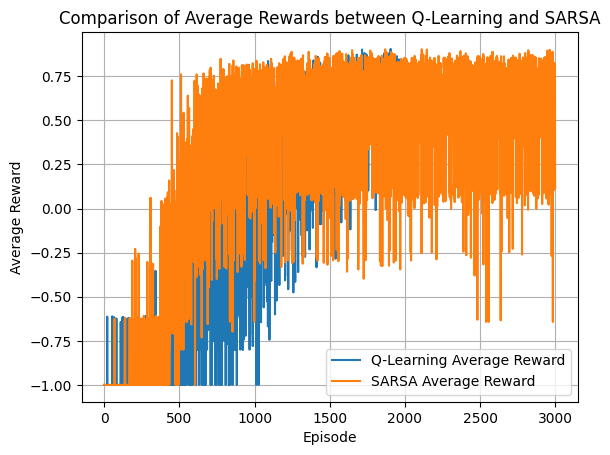

In [ ]:
plt.plot(Q_avg_rewards, label='Q-Learning Average Reward')
plt.plot(sarsa_avg_rewards, label='SARSA Average Reward')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Comparison of Average Rewards between Q-Learning and SARSA')
plt.legend()
plt.grid()
plt.show()

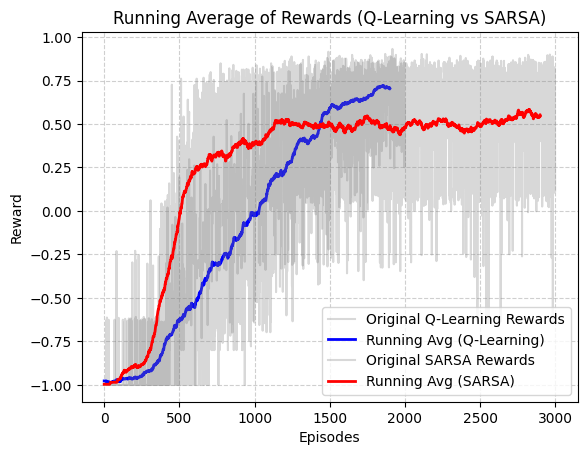

In [ ]:
plot_running_average_both(Q_avg_rewards, sarsa_avg_rewards, window_size=100, labels=("Q-Learning", "SARSA"))

Text(0, 0.5, 'Success Rate')

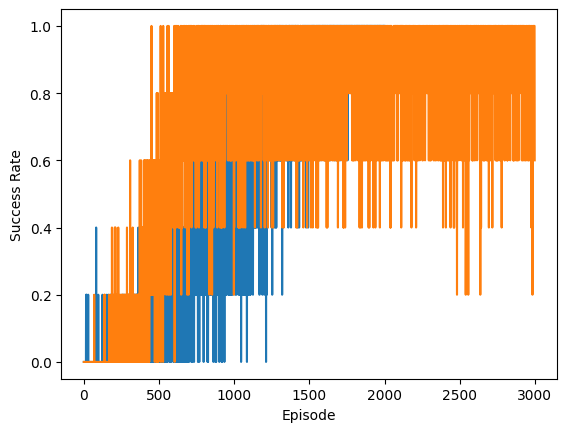

In [ ]:
!pip install minigrid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.7/136.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
!python dynamic_obstacle.py --algorithm sarsa

Starting run 1/5...
Run 1, Episode 100: Avg Reward = -0.98, Avg Steps = 5.65, Success Rate = 1.0%, epsilon = 0.606
Run 1, Episode 200: Avg Reward = -0.98, Avg Steps = 9.32, Success Rate = 1.0%, epsilon = 0.367
Run 1, Episode 300: Avg Reward = -0.97, Avg Steps = 14.87, Success Rate = 2.0%, epsilon = 0.222
Run 1, Episode 400: Avg Reward = -0.85, Avg Steps = 22.50, Success Rate = 9.0%, epsilon = 0.135
Run 1, Episode 500: Avg Reward = -0.67, Avg Steps = 29.08, Success Rate = 18.0%, epsilon = 0.082
Run 1, Episode 600: Avg Reward = 0.00, Avg Steps = 32.57, Success Rate = 58.0%, epsilon = 0.050
Run 1, Episode 700: Avg Reward = 0.35, Avg Steps = 24.56, Success Rate = 77.0%, epsilon = 0.050
Run 1, Episode 800: Avg Reward = 0.36, Avg Steps = 30.49, Success Rate = 79.0%, epsilon = 0.050
Run 1, Episode 900: Avg Reward = 0.35, Avg Steps = 28.08, Success Rate = 78.0%, epsilon = 0.050
Run 1, Episode 1000: Avg Reward = 0.27, Avg Steps = 31.10, Success Rate = 73.0%, epsilon = 0.050
Run 1, Episode 1100:

In [ ]:
!python dynamic_obstacle.py --algorithm q-learning

Starting run 1/5...
Run 1, Episode 100: Avg Reward = -1.00, Avg Steps = 6.25, Success Rate = 0.0%, Tau = 0.606
Run 1, Episode 200: Avg Reward = -1.00, Avg Steps = 6.67, Success Rate = 0.0%, Tau = 0.367
Run 1, Episode 300: Avg Reward = -0.98, Avg Steps = 12.65, Success Rate = 1.0%, Tau = 0.222
Run 1, Episode 400: Avg Reward = -0.97, Avg Steps = 28.57, Success Rate = 1.0%, Tau = 0.135
Run 1, Episode 500: Avg Reward = -0.84, Avg Steps = 42.87, Success Rate = 4.0%, Tau = 0.082
Run 1, Episode 600: Avg Reward = -0.47, Avg Steps = 52.88, Success Rate = 24.0%, Tau = 0.050
Run 1, Episode 700: Avg Reward = -0.21, Avg Steps = 59.41, Success Rate = 36.0%, Tau = 0.050
Run 1, Episode 800: Avg Reward = 0.13, Avg Steps = 58.11, Success Rate = 61.0%, Tau = 0.050
Run 1, Episode 900: Avg Reward = 0.33, Avg Steps = 52.96, Success Rate = 75.0%, Tau = 0.050
Run 1, Episode 1000: Avg Reward = 0.44, Avg Steps = 40.19, Success Rate = 84.0%, Tau = 0.050
Run 1, Episode 1100: Avg Reward = 0.56, Avg Steps = 37.81, 

In [ ]:

def plot_mean_std(avg_rewards, std_rewards, title="Training Performance", ylabel="Reward", filename="training_performance.png"):
    episodes = np.arange(len(avg_rewards))

    plt.figure()
    plt.plot(episodes, avg_rewards, label="Mean Reward", color="b", linewidth=2)
    plt.fill_between(episodes, avg_rewards - std_rewards, avg_rewards + std_rewards, color="b", alpha=0.2, label="±1 Std Dev")
    plt.xlabel("Episodes")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.6)

    # unique_filename = get_unique_filename(filename)
    # plt.savefig(unique_filename, dpi=300, bbox_inches="tight")
    # plt.close()
    # print(f"Saved plot: {unique_filename}")

def plot_running_average(rewards, window_size=100, title="Running Average of Rewards", ylabel="Reward", filename="running_average.png"):
    episodes = np.arange(len(rewards))
    running_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')

    plt.figure()
    plt.plot(episodes, rewards, label="Original Rewards", color="gray", alpha=0.4)
    plt.plot(episodes[:len(running_avg)], running_avg, label=f"Running Avg ({window_size} episodes)", color="b", linewidth=2)
    plt.xlabel("Episodes")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)

    # unique_filename = get_unique_filename(filename)
    # plt.savefig(unique_filename, dpi=300, bbox_inches="tight")
    # plt.close()
    # print(f"Saved plot: {unique_filename}")

def plot_cumulative_regret(target, avg_rw, filename="cumulative_regret.png"):
    optimal_rewards = np.full_like(avg_rw, target)
    cumulative_regret = np.cumsum(optimal_rewards - avg_rw)

    plt.figure()
    plt.plot(cumulative_regret, label="Cumulative Regret", color='red')
    plt.xlabel("Episodes")
    plt.ylabel("Cumulative Regret")
    plt.title("Cumulative Regret over Episodes")
    plt.legend()
    plt.grid()

    # unique_filename = get_unique_filename(filename)
    # plt.savefig(unique_filename, dpi=300, bbox_inches="tight")
    # plt.close()
    # print(f"Saved plot: {unique_filename}")

def plot_cumulative_regret_both(target, q_learning_rewards, sarsa_rewards, labels=("Q-Learning", "SARSA")):
    optimal_rewards = np.full_like(q_learning_rewards, target)
    cumulative_regret_q = np.cumsum(optimal_rewards - q_learning_rewards)
    cumulative_regret_sarsa = np.cumsum(optimal_rewards - sarsa_rewards)
    plt.plot(cumulative_regret_q, label=f"Cumulative Regret ({labels[0]})", color='blue')
    plt.plot(cumulative_regret_sarsa, label=f"Cumulative Regret ({labels[1]})", color='red')
    plt.xlabel("Episodes")
    plt.ylabel("Cumulative Regret")
    plt.title("Cumulative Regret over Episodes (Q-Learning vs SARSA)")
    plt.legend()
    plt.grid()
    plt.show()
def plot_running_average_both(q_rewards, sarsa_rewards, window_size=100, labels=("Q-Learning", "SARSA")):
    episodes_q = np.arange(len(q_rewards))
    episodes_sarsa = np.arange(len(sarsa_rewards))
    running_avg_q = np.convolve(q_rewards, np.ones(window_size)/window_size, mode='valid')
    running_avg_sarsa = np.convolve(sarsa_rewards, np.ones(window_size)/window_size, mode='valid')
    plt.plot(episodes_q, q_rewards, label=f"Original {labels[0]} Rewards", color="gray", alpha=0.3)
    plt.plot(episodes_q[:len(running_avg_q)], running_avg_q, label=f"Running Avg ({labels[0]})", color="b", linewidth=2)
    plt.plot(episodes_sarsa, sarsa_rewards, label=f"Original {labels[1]} Rewards", color="gray", alpha=0.3)
    plt.plot(episodes_sarsa[:len(running_avg_sarsa)], running_avg_sarsa, label=f"Running Avg ({labels[1]})", color="r", linewidth=2)
    plt.xlabel("Episodes")
    plt.ylabel("Reward")
    plt.title("Running Average of Rewards (Q-Learning vs SARSA)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()
plot_running_average(avg_rewards, window_size=100, title="Running Average of Rewards", ylabel="Reward", filename="running_average.png")
plot_mean_std(avg_rewards, std_rewards, title="Training Performance", ylabel="Reward", filename="training_performance.png")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def train(agent, env, episodes=3000):
    rewards_per_episode = []
    steps_per_episode = []
    success_rate = []

    for episode in range(episodes):
        obs, _ = env.reset()
        state_key = agent.get_state_key(obs)
        action = agent.choose_action(state_key)

        done = False
        total_reward = 0
        steps = 0
        success = False

        while not done:
            next_obs, reward, terminated, truncated, _ = env.step(action)
            next_state_key = agent.get_state_key(next_obs)
            next_action = agent.choose_action(next_state_key)
            done = terminated or truncated

            agent.update_q_table(state_key, action, reward, next_state_key, next_action, done)

            state_key, action = next_state_key, next_action
            total_reward += reward
            steps += 1

            if reward > 0:
                success = True

            if steps >= 100:
                done = True

        rewards_per_episode.append(total_reward)
        steps_per_episode.append(steps)
        success_rate.append(1 if success else 0)
        agent.decay_epsilon()

        if (episode + 1) % 100 == 0:
            recent_success_rate = np.mean(success_rate[-100:]) * 100
            print(f"Episode {episode+1}: Success Rate = {recent_success_rate:.1f}%, Epsilon = {agent.epsilon:.3f}")

    return np.array(rewards_per_episode), np.array(steps_per_episode), np.array(success_rate)

def train_multiple_runs(agent_class, env, episodes=3000, n_runs=5):
    all_rewards = []
    all_steps = []
    all_success = []

    for _ in range(n_runs):
        agent = agent_class(env)
        rewards, steps, success = train(agent, env, episodes)
        all_rewards.append(rewards)
        all_steps.append(steps)
        all_success.append(success)

    all_rewards = np.array(all_rewards)
    all_steps = np.array(all_steps)
    all_success = np.array(all_success)

    avg_rewards = np.mean(all_rewards, axis=0)
    std_rewards = np.std(all_rewards, axis=0)

    avg_steps = np.mean(all_steps, axis=0)
    std_steps = np.std(all_steps, axis=0)

    avg_success = np.mean(all_success, axis=0)

    # Plot results
    episodes = np.arange(episodes)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(episodes, avg_rewards, label='Mean Reward', color='b')
    plt.fill_between(episodes, avg_rewards - std_rewards, avg_rewards + std_rewards, color='b', alpha=0.2, label='±1 Std Dev')
    plt.xlabel("Episodes")
    plt.ylabel("Reward")
    plt.title("Average Rewards per Episode")
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(episodes, avg_steps, label='Mean Steps', color='g')
    plt.fill_between(episodes, avg_steps - std_steps, avg_steps + std_steps, color='g', alpha=0.2, label='±1 Std Dev')
    plt.xlabel("Episodes")
    plt.ylabel("Steps")
    plt.title("Average Steps per Episode")
    plt.legend()
    plt.grid()

    plt.show()

    return avg_rewards, std_rewards, avg_steps, std_steps, avg_success


Episode 100: Success Rate = 0.0%, Epsilon = 0.606
Episode 200: Success Rate = 2.0%, Epsilon = 0.367
Episode 300: Success Rate = 5.0%, Epsilon = 0.222
Episode 400: Success Rate = 15.0%, Epsilon = 0.135
Episode 500: Success Rate = 21.0%, Epsilon = 0.082
Episode 600: Success Rate = 50.0%, Epsilon = 0.050
Episode 700: Success Rate = 36.0%, Epsilon = 0.050
Episode 800: Success Rate = 61.0%, Epsilon = 0.050
Episode 900: Success Rate = 55.0%, Epsilon = 0.050
Episode 1000: Success Rate = 73.0%, Epsilon = 0.050
Episode 1100: Success Rate = 77.0%, Epsilon = 0.050
Episode 1200: Success Rate = 62.0%, Epsilon = 0.050
Episode 1300: Success Rate = 80.0%, Epsilon = 0.050
Episode 1400: Success Rate = 81.0%, Epsilon = 0.050
Episode 1500: Success Rate = 79.0%, Epsilon = 0.050
Episode 1600: Success Rate = 75.0%, Epsilon = 0.050
Episode 1700: Success Rate = 80.0%, Epsilon = 0.050
Episode 1800: Success Rate = 78.0%, Epsilon = 0.050
Episode 1900: Success Rate = 85.0%, Epsilon = 0.050
Episode 2000: Success Ra

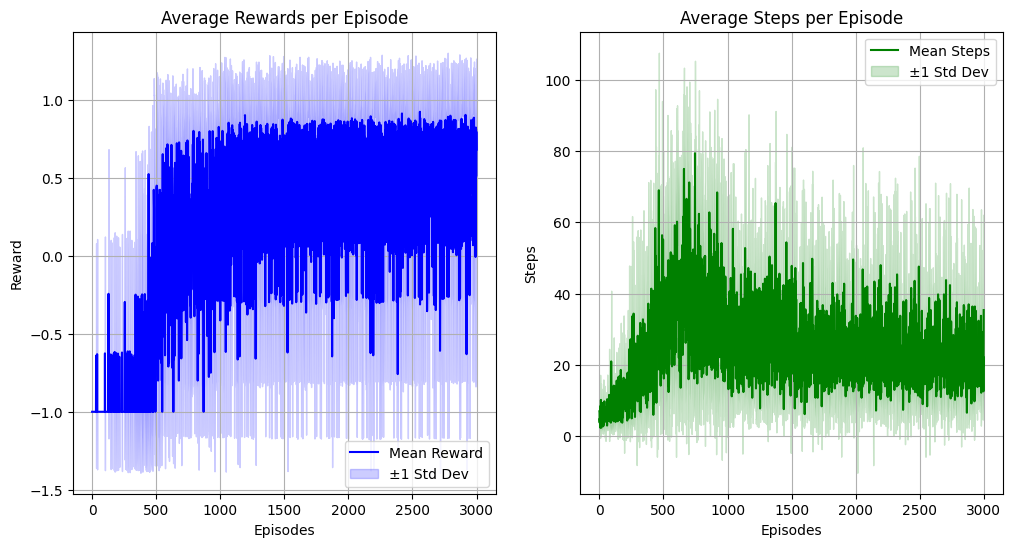

(array([-1.    , -1.    , -1.    , ...,  0.51  ,  0.7966,  0.6814]),
 array([0.        , 0.        , 0.        , ..., 0.75531106, 0.11421138,
        0.24140141]),
 array([ 7. ,  6.6,  3.8, ..., 12.6, 22.6, 35.4]),
 array([ 4.19523539,  2.87054002,  1.46969385, ...,  2.41660919,
        12.69015366, 26.82237872]),
 array([0. , 0. , 0. , ..., 0.8, 1. , 1. ]))

In [ ]:


env = gym.make("MiniGrid-Dynamic-Obstacles-5x5-v0", render_mode="rgb_array")
agent = SARSAAgent(env,alpha=0.1,gamma=0.9,epsilon=0.5,epsilon_min=0.005,epsilon_decay=0.99)
train_multiple_runs(SARSAAgent, env, episodes=3000, n_runs=5)

In [ ]:
class Dynamic_obstacle_agents:
  def __init__(self,env,alpha=0.1,gamma=0.99) :
      self.env=env
      self.alpha=alpha
      self.gamma=gamma
      self.q_table = {}
      self.num_actions = env.action_space.n
  def get_state_key(self, obs):
        env_grid = self.env.unwrapped.grid.encode()
        agent_pos = self.env.unwrapped.agent_pos
        agent_dir = self.env.unwrapped.agent_dir

        x, y = agent_pos
        surrounding = []
        for i in range(max(0, x-1), min(x+2, self.env.unwrapped.width)):
            for j in range(max(0, y-1), min(y+2, self.env.unwrapped.height)):
                cell_type = env_grid[j, i, 0]
                surrounding.append(int(cell_type))

        state_tuple = (x, y, agent_dir) + tuple(surrounding)
        return hash(state_tuple)

  def get_q_values(self, state_key):
      if state_key not in self.q_table:
          self.q_table[state_key] = np.zeros(self.num_actions)
      return self.q_table[state_key]
class SARSAAgent(Dynamic_obstacle_agents):
  def __init__(self, env, alpha=0.1, gamma=0.99,epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.995):
      super().__init__(env, alpha, gamma)
      self.epsilon=epsilon
      self.epsilon_min=epsilon_min
      self.epsilon_decay=epsilon_decay
  def choose_action(self, state_key):
      if np.random.random() < self.epsilon:
          return self.env.action_space.sample()
      else:
          q_values = self.get_q_values(state_key)
          max_q = np.max(q_values)
          actions = np.where(q_values == max_q)[0]
          return np.random.choice(actions)

  def update_q_table(self, state_key, action, reward, next_state_key, next_action, done):
      q_values = self.get_q_values(state_key)
      next_q_values = self.get_q_values(next_state_key)
      target = reward + (self.gamma * next_q_values[next_action] if not done else 0)
      q_values[action] += self.alpha * (target - q_values[action])

  def decay_eps(self):
      if self.epsilon > self.epsilon_min:
          self.epsilon *= self.epsilon_decay
class QLearningAgent(Dynamic_obstacle_agents):
  def __init__(self, env, alpha=0.1, gamma=0.99,tau=1.0, tau_min=0.1, tau_decay=0.995):
      super().__init__(env, alpha, gamma)
      self.tau=tau
      self.tau_min=tau_min
      self.tau_decay=tau_decay
  def softmax(self, q_values):
      q_values = q_values - np.max(q_values)
      exp_values = np.exp(q_values / self.tau)
      probabilities = exp_values / np.sum(exp_values)
      return probabilities

  def choose_action(self, state_key):
      q_values = self.get_q_values(state_key)
      probabilities = self.softmax(q_values)
      action = np.random.choice(self.num_actions, p=probabilities)
      return action

  def update_q_table(self, state_key, action, reward, next_state_key, done):
      q_values = self.get_q_values(state_key)
      next_q_values = self.get_q_values(next_state_key)
      best_next_q = np.max(next_q_values) if not done else 0
      q_values[action] += self.alpha * (reward + self.gamma * best_next_q - q_values[action])

  def decay_tau(self):
      if self.tau > self.tau_min:
          self.tau *= self.tau_decay



In [ ]:
def train(agent, env, episodes=3000):
    rewards_per_episode = []
    steps_per_episode = []
    success_rate = []

    for episode in range(episodes):
        obs, _ = env.reset()
        state_key = agent.get_state_key(obs)
        action = agent.choose_action(state_key)

        done = False
        total_reward = 0
        steps = 0
        success = False

        while not done:
            if isinstance(agent,QLearningAgent):
              action= agent.choose_action(state_key)
            next_obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_state_key = agent.get_state_key(next_obs)
            if isinstance(agent, SARSAAgent):
              next_action = agent.choose_action(next_state_key)

              agent.update_q_table(state_key, action, reward, next_state_key, next_action, done)
              action =  next_action
            else:
              agent.update_q_table(state_key, action, reward, next_state_key, done)
            state_key = next_state_key


            total_reward += reward
            steps += 1

            if reward > 0:
                success = True

            # if steps >= 100:
            #     done = True

        rewards_per_episode.append(total_reward)
        steps_per_episode.append(steps)
        success_rate.append(1 if success else 0)
        if isinstance(agent, SARSAAgent):
          agent.decay_eps()
        elif isinstance(agent, QLearningAgent):
          agent.decay_tau()


        if (episode + 1) % 100 == 0:
            recent_success_rate = np.mean(success_rate[-100:]) * 100
            if isinstance(agent, SARSAAgent):
              print(f"Episode {episode+1}: Success Rate = {recent_success_rate:.1f}%, Epsilon = {agent.epsilon:.3f}")
            elif isinstance(agent, QLearningAgent):
              print(f"Episode {episode+1}: Success Rate = {recent_success_rate:.1f}%, Tau = {agent.tau:.3f}")

    return rewards_per_episode, steps_per_episode, success_rate

env = gym.make("MiniGrid-Empty-5x5-v0")


In [ ]:
# Test SARSA Agent
sarsa_agent = SARSAAgent(env)
print("Training SARSA agent...")
rewards_sarsa, steps_sarsa, success_sarsa = train(sarsa_agent, env, episodes=500)

Training SARSA agent...
Episode 100: Success Rate = 83.0%, Epsilon = 0.606
Episode 200: Success Rate = 100.0%, Epsilon = 0.367
Episode 300: Success Rate = 100.0%, Epsilon = 0.222
Episode 400: Success Rate = 100.0%, Epsilon = 0.135
Episode 500: Success Rate = 100.0%, Epsilon = 0.082


In [ ]:
Q_agent=QLearningAgent(env)
print("Training Q-learning agent...")
rewards_Q, steps_Q, success_Q = train(Q_agent, env, episodes=5000)

Training Q-learning agent...
Episode 100: Success Rate = 58.0%, Tau = 0.606
Episode 200: Success Rate = 69.0%, Tau = 0.367
Episode 300: Success Rate = 68.0%, Tau = 0.222
Episode 400: Success Rate = 50.0%, Tau = 0.135
Episode 500: Success Rate = 49.0%, Tau = 0.100


In [ ]:
Q_agent=QLearningAgent(env)
print("Training Q-learning agent...")
rewards_Q, steps_Q, success_Q = train(Q_agent, env, episodes=5000)

Training Q-learning agent...
Episode 100: Success Rate = 53.0%, Tau = 0.606
Episode 200: Success Rate = 68.0%, Tau = 0.367
Episode 300: Success Rate = 60.0%, Tau = 0.222
Episode 400: Success Rate = 72.0%, Tau = 0.135
Episode 500: Success Rate = 81.0%, Tau = 0.100
Episode 600: Success Rate = 76.0%, Tau = 0.100
Episode 700: Success Rate = 54.0%, Tau = 0.100
Episode 800: Success Rate = 58.0%, Tau = 0.100
Episode 900: Success Rate = 44.0%, Tau = 0.100
Episode 1000: Success Rate = 45.0%, Tau = 0.100
Episode 1100: Success Rate = 31.0%, Tau = 0.100
Episode 1200: Success Rate = 36.0%, Tau = 0.100
Episode 1300: Success Rate = 38.0%, Tau = 0.100
Episode 1400: Success Rate = 46.0%, Tau = 0.100
Episode 1500: Success Rate = 42.0%, Tau = 0.100
Episode 1600: Success Rate = 66.0%, Tau = 0.100
Episode 1700: Success Rate = 57.0%, Tau = 0.100
Episode 1800: Success Rate = 42.0%, Tau = 0.100
Episode 1900: Success Rate = 29.0%, Tau = 0.100
Episode 2000: Success Rate = 38.0%, Tau = 0.100
Episode 2100: Succes

In [ ]:
import numpy as np

class DynamicObstacleAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.q_table = {}
        self.num_actions = env.action_space.n

    def get_state_key(self, obs):
        """Encodes the agent's state as a hashable key."""
        env_grid = self.env.unwrapped.grid.encode()
        agent_pos = self.env.unwrapped.agent_pos
        agent_dir = self.env.unwrapped.agent_dir

        x, y = agent_pos
        surrounding = []
        for i in range(max(0, x-1), min(x+2, self.env.unwrapped.width)):
            for j in range(max(0, y-1), min(y+2, self.env.unwrapped.height)):
                cell_type = env_grid[j, i, 0]
                surrounding.append(int(cell_type))

        state_tuple = (x, y, agent_dir) + tuple(surrounding)
        return hash(state_tuple)

    def get_q_values(self, state_key):
        """Retrieve or initialize Q-values for the given state."""
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.num_actions)
        return self.q_table[state_key]


class SARSAAgent(DynamicObstacleAgent):
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_min=0.05, epsilon_decay=0.995):
        super().__init__(env, alpha, gamma)
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay

    def choose_action(self, state_key):
        """Epsilon-greedy action selection."""
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = self.get_q_values(state_key)
            max_q = np.max(q_values)
            actions = np.where(q_values == max_q)[0]
            return np.random.choice(actions)

    def update_q_table(self, state_key, action, reward, next_state_key, next_action, done):
        """SARSA update rule."""
        q_values = self.get_q_values(state_key)
        next_q_values = self.get_q_values(next_state_key)
        target = reward + (self.gamma * next_q_values[next_action] if not done else 0)
        q_values[action] += self.alpha * (target - q_values[action])

    def decay_exploration(self):
        """Decay epsilon for exploration."""
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


class QLearningAgent(DynamicObstacleAgent):
    def __init__(self, env, alpha=0.1, gamma=0.99, tau=1.0, tau_min=0.1, tau_decay=0.995):
        super().__init__(env, alpha, gamma)
        self.tau = tau
        self.tau_min = tau_min
        self.tau_decay = tau_decay

    def softmax(self, q_values):
        """Compute softmax probabilities for action selection."""
        q_values = q_values - np.max(q_values)  # Prevent overflow
        exp_values = np.exp(q_values / self.tau)
        probabilities = exp_values / np.sum(exp_values)
        return probabilities

    def choose_action(self, state_key):
        """Softmax-based action selection."""
        q_values = self.get_q_values(state_key)
        probabilities = self.softmax(q_values)
        return np.random.choice(self.num_actions, p=probabilities)

    def update_q_table(self, state_key, action, reward, next_state_key, done):
        """Q-learning update rule."""
        q_values = self.get_q_values(state_key)
        next_q_values = self.get_q_values(next_state_key)
        best_next_q = np.max(next_q_values) if not done else 0
        q_values[action] += self.alpha * (reward + self.gamma * best_next_q - q_values[action])

    def decay_exploration(self):
        """Decay temperature (tau) for exploration."""
        if self.tau > self.tau_min:
            self.tau *= self.tau_decay


In [ ]:
import numpy as np
import gym

def train(agent, env, episodes=3000):
    rewards_per_episode = []
    steps_per_episode = []
    success_rate = []

    for episode in range(episodes):
        obs, _ = env.reset()
        state_key = agent.get_state_key(obs)
        action = agent.choose_action(state_key)

        done = False
        total_reward = 0
        steps = 0
        success = False

        while not done:
            next_obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_state_key = agent.get_state_key(next_obs)

            if isinstance(agent, SARSAAgent):
                next_action = agent.choose_action(next_state_key)
                agent.update_q_table(state_key, action, reward, next_state_key, next_action, done)
                action = next_action  # SARSA selects next action before next iteration
            else:  # Q-Learning
                agent.update_q_table(state_key, action, reward, next_state_key, done)
                action = agent.choose_action(next_state_key)

            state_key = next_state_key
            total_reward += reward
            steps += 1

            if reward > 0:
                success = True

        rewards_per_episode.append(total_reward)
        steps_per_episode.append(steps)
        success_rate.append(1 if success else 0)

        if hasattr(agent, 'decay_eps'):  # SARSA
            agent.decay_eps()
        elif hasattr(agent, 'decay_tau'):  # Q-Learning
            agent.decay_tau()

        if (episode + 1) % 100 == 0:
            recent_success_rate = np.mean(success_rate[-100:]) * 100
            epsilon_or_tau = agent.epsilon if hasattr(agent, 'epsilon') else agent.tau
            param_name = "Epsilon" if hasattr(agent, 'epsilon') else "Tau"
            print(f"Episode {episode+1}: Success Rate = {recent_success_rate:.1f}%, {param_name} = {epsilon_or_tau:.3f}")

    return rewards_per_episode, steps_per_episode, success_rate


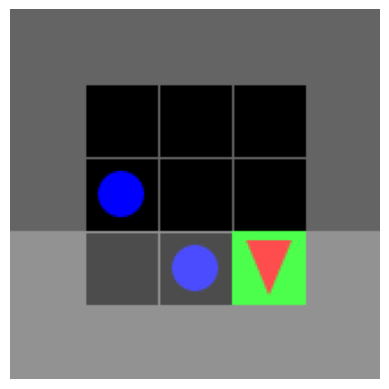

KeyboardInterrupt: 

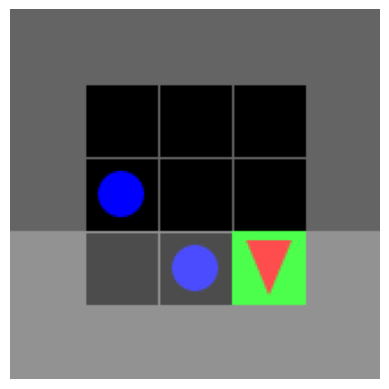

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
import cv2
from minigrid.wrappers import ImgObsWrapper
from IPython.display import display, clear_output
import time

def visualize_agent(agent, env, episodes=1, delay=0.1):
    """Visualize the agent's performance by rendering frames."""
    for episode in range(episodes):
        obs, _ = env.reset()
        state_key = agent.get_state_key(obs)
        done = False
        total_reward = 0
        frames = []

        while not done:
            # Use greedy action selection
            q_values = agent.get_q_values(state_key)
            action = np.argmax(q_values)

            # Take step
            next_obs, reward, terminated, truncated, _ = env.step(action)
            next_state_key = agent.get_state_key(next_obs)
            done = terminated or truncated

            # Store the frame
            frames.append(env.render())

            state_key = next_state_key
            total_reward += reward

            if len(frames) >= 100:  # Limit steps per episode
                break

        print(f"Episode {episode+1}: Total Reward = {total_reward}")

        # Display the animation
        for frame in frames:
            clear_output(wait=True)
            plt.imshow(frame)
            plt.axis("off")
            display(plt.gcf())
            time.sleep(delay)

# Create the environment
env = gym.make("MiniGrid-Dynamic-Obstacles-5x5-v0", render_mode="rgb_array")

# Initialize agent
agent = SoftmaxQLearningAgent(env)

# Train the agent
print("Training the agent...")
rewards, steps, successes = train(agent, env, episodes=3000)

# Visualize the trained agent
visualize_agent(agent, env, episodes=3, delay=0.2)


In [ ]:
env = gym.make("MiniGrid-Dynamic-Obstacles-5x5-v0", render_mode="rgb_array")
env.reset()

({'image': array([[[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [6, 2, 0],
          [1, 0, 0],
          [1, 0, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [1, 0, 0],
          [1, 0, 0],
          [1, 0, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [8, 1, 0],
          [6, 2, 0],
          [1, 0, 0]],
  
         [[2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
          [2, 5, 0],
 

In [ ]:
env.unwrapped.grid.encode()

array([[[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]],

       [[2, 5, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [2, 5, 0]],

       [[2, 5, 0],
        [1, 0, 0],
        [1, 0, 0],
        [6, 2, 0],
        [2, 5, 0]],

       [[2, 5, 0],
        [6, 2, 0],
        [1, 0, 0],
        [8, 1, 0],
        [2, 5, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]]], dtype=uint8)

In [ ]:
env.unwrapped.agent_pos
env.unwrapped.agent_dir

0

In [ ]:
print(env.unwrapped.agent_pos)


(1, 1)


In [ ]:
%%writefile mountain.py
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, display

from collections import deque
import argparse
import time
import random
np.random.seed(42)

class SplitToBins:
    def __init__(self, env, n_bins=(20, 20)):
        self.env = env
        self.n_bins = n_bins
        self.obs_low = env.observation_space.low
        self.obs_high = env.observation_space.high
        self.bin_width = (self.obs_high - self.obs_low) / n_bins
    def split_to_bin(self, observation):
        clipped_obs = np.clip(observation, self.obs_low, self.obs_high)
        bin_indices = np.floor((clipped_obs - self.obs_low) / self.bin_width).astype(int)
        bin_indices = np.clip(bin_indices, 0, np.array(self.n_bins) - 1)
        state_index = bin_indices[0] * self.n_bins[1] + bin_indices[1]
        return state_index

class QLearningAgent:
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.99,initial_tau=1.0, tau_decay=0.99, min_tau=0.01):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.tau = initial_tau
        self.tau_decay = tau_decay
        self.min_tau = min_tau
        self.q_table = np.zeros((n_states, n_actions))
    def select_action(self, s):
        q_values = self.q_table[s]
        q_values = q_values - np.max(q_values)
        exp_q = np.exp(q_values / max(self.tau, 1e-10))
        if np.any(np.isnan(exp_q)) or np.any(np.isinf(exp_q)):
            return np.argmax(self.q_table[s])
        sum_exp_q = np.sum(exp_q)
        if sum_exp_q == 0:
            return np.argmax(self.q_table[s])
        probabilities = exp_q / sum_exp_q
        try:
            action = np.random.choice(self.n_actions, p=probabilities)
            return action
        except:
            return np.argmax(self.q_table[s])
    def update(self, s, a, r, ns, done):
        if done:
            R = r
        else:
            R = r + self.gamma * np.max(self.q_table[ns])
        self.q_table[s, a] += self.alpha * (R - self.q_table[s, a])
    def decay_tau(self):
        self.tau = max(self.min_tau, self.tau * self.tau_decay)

class SarsaAgent:
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.99,initial_epsilon=0.3, epsilon_decay=0.995, min_epsilon=0.01):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.q_table = np.zeros((n_states, n_actions))

    def select_action(self, state):
        if np.random.random() < self.epsilon:

            action = np.random.randint(self.n_actions)
        else:

            action = np.argmax(self.q_table[state])
        return action

    def update(self, s, a, r, ns, na, done):
        """Update Q-values using SARSA."""

        if done:
            target = r
        else:
            target = r + self.gamma * self.q_table[ns, na]


        self.q_table[s, a] += self.alpha * (target - self.q_table[s, a])

    def decay_eps(self):
        """Decay epsilon parameter for ε-greedy."""
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)



def plot_mean_std(avg_rewards, std_rewards, title="Training Performance", ylabel="Reward"):
    episodes = np.arange(len(avg_rewards))
    plt.figure(figsize=(10, 5))
    plt.plot(episodes, avg_rewards, label="Mean Reward", color="b", linewidth=2)
    plt.fill_between(episodes, avg_rewards - std_rewards, avg_rewards + std_rewards,color="b", alpha=0.2, label="±1 Std Dev")
    plt.xlabel("Episodes")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True,  alpha=0.6)
    plt.show()

def plot_running_average(rewards, window_size=100, title="Running Average of Rewards", ylabel="Reward"):
    episodes = np.arange(len(rewards))
    running_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    plt.figure(figsize=(10, 5))
    plt.plot(episodes, rewards, label="Original Rewards", color="gray", alpha=0.4)
    plt.plot(episodes[:len(running_avg)], running_avg, label=f"Running Avg ({window_size} episodes)", color="b", linewidth=2)
    plt.xlabel("Episodes")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


def plot_cumulative_regret(optimal_value, avg_rewards):
    optimal_rewards = np.full_like(avg_rewards, optimal_value)
    cumulative_regret = np.cumsum(optimal_rewards - avg_rewards)

    plt.figure(figsize=(8, 5))
    plt.plot(cumulative_regret, label="Cumulative Regret", color='red')
    plt.xlabel("Episodes")
    plt.ylabel("Cumulative Regret")
    plt.title("Cumulative Regret over Episodes")
    plt.legend()
    plt.grid()
    plt.show()

def plot_cumulative_regret_both(optimal_value, q_learning_rewards, sarsa_rewards, labels=("Q-Learning", "SARSA")):
    optimal_rewards = np.full_like(q_learning_rewards, optimal_value)
    cumulative_regret_q = np.cumsum(optimal_rewards - q_learning_rewards)
    cumulative_regret_sarsa = np.cumsum(optimal_rewards - sarsa_rewards)
    plt.figure(figsize=(8, 5))
    plt.plot(cumulative_regret_q, label=f"Cumulative Regret ({labels[0]})", color='blue')
    plt.plot(cumulative_regret_sarsa, label=f"Cumulative Regret ({labels[1]})", color='red')
    plt.xlabel("Episodes")
    plt.ylabel("Cumulative Regret")
    plt.title("Cumulative Regret over Episodes (Q-Learning vs SARSA)")
    plt.legend()
    plt.grid()
    plt.show()

def plot_running_average_both(q_rewards, sarsa_rewards, window_size=100, labels=("Q-Learning", "SARSA")):
    episodes_q = np.arange(len(q_rewards))
    episodes_sarsa = np.arange(len(sarsa_rewards))
    running_avg_q = np.convolve(q_rewards, np.ones(window_size)/window_size, mode='valid')
    running_avg_sarsa = np.convolve(sarsa_rewards, np.ones(window_size)/window_size, mode='valid')
    plt.figure(figsize=(10, 5))
    plt.plot(episodes_q, q_rewards, label=f"Original {labels[0]} Rewards", color="gray", alpha=0.3)
    plt.plot(episodes_q[:len(running_avg_q)], running_avg_q, label=f"Running Avg ({labels[0]})", color="b", linewidth=2)
    plt.plot(episodes_sarsa, sarsa_rewards, label=f"Original {labels[1]} Rewards", color="gray", alpha=0.3)
    plt.plot(episodes_sarsa[:len(running_avg_sarsa)], running_avg_sarsa, label=f"Running Avg ({labels[1]})", color="r", linewidth=2)
    plt.xlabel("Episodes")
    plt.ylabel("Reward")
    plt.title("Running Average of Rewards (Q-Learning vs SARSA)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()



def train_sarsa(env_name='MountainCar-v0', n_episodes=1000, n_bins=(20, 20),alpha=0.1, gamma=0.99, initial_epsilon=0.3,epsilon_decay=0.995, min_epsilon=0.01, n_runs=5):


    print("training sarsa")
    env = gym.make(env_name)
    mountain_car_env = SplitToBins(env, n_bins)

    n_states = np.prod(n_bins)
    n_actions = env.action_space.n

    avg_run_rewards = np.zeros(n_episodes, dtype=np.float32)
    avg_run_lengths = np.zeros(n_episodes, dtype=np.float32)

    all_rewards = np.full((n_runs, n_episodes), np.nan, dtype=np.float32)

    for run in range(n_runs):
        agent = SarsaAgent(n_states, n_actions, alpha, gamma,
                           initial_epsilon, epsilon_decay, min_epsilon)

        ep_rs = np.zeros(n_episodes, dtype=np.float32)
        ep_ls = np.zeros(n_episodes, dtype=np.int32)
        avg_rewards = deque(maxlen=100)

        for episode in range(n_episodes):
            observation, _ = env.reset()
            s = mountain_car_env.split_to_bin(observation)
            a = agent.select_action(s)

            ep_r = 0
            ep_l = 0
            success = False
            time_end = False

            while not (success or time_end):
                next_observation, r, success, time_end, _ = env.step(a)
                ns = mountain_car_env.split_to_bin(next_observation)
                na = agent.select_action(ns)

                agent.update(s, a, r, ns, na, success or time_end)
                s = ns
                a = na
                ep_r += r
                ep_l += 1
            agent.decay_eps()

            ep_rs[episode] = ep_r
            ep_ls[episode] = ep_l
            avg_rewards.append(ep_r)
            all_rewards[run, episode] = ep_r

            if (episode + 1) % 1000 == 0:
                avg_reward = np.mean(avg_rewards)
                print(f"Run:{run} Episode {episode+1}/{n_episodes}, Avg Reward: {avg_reward:.2f}, Epsilon: {agent.epsilon:.4f}")

            if len(avg_rewards) == 100 and np.mean(avg_rewards) >= -110:
                print(f"Environment solved in {episode+1} episodes!")
                ep_rs[episode+1:] = -110   # will fill the remaining timestp with -110 so that the figure will make sense
                break

        avg_run_rewards += ep_rs
        avg_run_lengths += ep_ls

    env.close()

    avg_rewards_final = avg_run_rewards / n_runs
    avg_lengths_final = avg_run_lengths / n_runs
    std_rewards_final = np.nanstd(all_rewards, axis=0)

    return agent, avg_rewards_final, avg_lengths_final, std_rewards_final


def train_q_learning(env_name='MountainCar-v0', n_episodes=1000, n_bins=(20, 20),alpha=0.1, gamma=0.99, initial_tau=1.0,tau_decay=0.99, min_tau=0.01, n_runs=5):

    print("Starting Q-learning")
    env = gym.make(env_name)
    mountain_car_env = SplitToBins(env, n_bins)

    n_states = np.prod(n_bins)
    n_actions = env.action_space.n

    avg_run_rewards = np.zeros(n_episodes, dtype=np.float32)
    avg_run_lengths = np.zeros(n_episodes, dtype=np.float32)
    valid_counts = np.zeros(n_episodes, dtype=np.int32)

    all_rewards = np.full((n_runs, n_episodes), np.nan, dtype=np.float32)

    for run in range(n_runs):
        agent = QLearningAgent(n_states, n_actions, alpha, gamma,initial_tau, tau_decay, min_tau)

        episode_rewards = np.zeros(n_episodes, dtype=np.float32)
        episode_lengths = np.zeros(n_episodes, dtype=np.int32)
        avg_rewards = deque(maxlen=100)
        for episode in range(n_episodes):
            observation, _ = env.reset()
            s = mountain_car_env.split_to_bin(observation)
            ep_r = 0
            ep_l = 0
            success = False
            time_end = False
            while not (success or time_end):
                a = agent.select_action(s)
                next_observation, r, success, time_end, _ = env.step(a)
                ns = mountain_car_env.split_to_bin(next_observation)
                agent.update(s, a, r, ns, success or time_end)
                s = ns
                ep_r += r
                ep_l += 1
            agent.decay_tau()
            episode_rewards[episode] = ep_r
            episode_lengths[episode] = ep_l
            avg_rewards.append(ep_r)
            avg_reward = np.mean(avg_rewards)
            if len(avg_rewards) == 100 and avg_reward >= -110:
                print(f"Run:{run} Episode {episode+1}/{n_episodes}, Avg Reward: {avg_reward:.2f}, Temperature: {agent.temperature:.4f}")
                print(f"Environment solved in {episode+1} episodes!")
                episode_rewards[episode+1:] = -110  # will fill the remaining timestp with -110 so that the figure will make sense
                break
            if (episode + 1) % 1000 == 0:
                print(f"Run:{run} Episode {episode+1}/{n_episodes}, Avg Reward: {avg_reward:.2f}, Temperature: {agent.temperature:.4f}")

        for ep in range(n_episodes):
            if episode_rewards[ep] != 0:
                avg_run_rewards[ep] += episode_rewards[ep]
                avg_run_lengths[ep] += episode_lengths[ep]
                valid_counts[ep] += 1
                all_rewards[run, ep] = episode_rewards[ep]

    env.close()

    avg_rewards_final = np.divide(avg_run_rewards, valid_counts, where=valid_counts > 0)
    avg_lengths_final = np.divide(avg_run_lengths, valid_counts, where=valid_counts > 0)
    std_rewards_final = np.nanstd(all_rewards, axis=0)

    return agent, avg_rewards_final, avg_lengths_final, std_rewards_final



def main():
    parser = argparse.ArgumentParser(description="Reinforcement Learning: Q-Learning-with-softmax vs SARSA-with-epsilon-greedy for MountainCar-v0 with discrete action space")
    parser.add_argument("--algo", type=str, choices=["q_learning", "sarsa", "both"], required=True, help="Algorithm to use: q_learning, sarsa, or both")
    parser.add_argument("--env_name", type=str, default="MountainCar-v0", help="Gym environment name")
    parser.add_argument("--n_episodes", type=int, default=100000, help="Number of training episodes")
    parser.add_argument("--pos_bins", type=int, default=40, help="Number of bins for position discretization")
    parser.add_argument("--vel_bins", type=int, default=40, help="Number of bins for velocity discretization")

    parser.add_argument("--learning_rate", type=float, default=0.1, help="Learning rate")
    parser.add_argument("--discount_factor", type=float, default=0.99, help="Discount factor (gamma)")

    parser.add_argument("--initial_temp", type=float, default=10.0, help="Initial temperature for Boltzmann exploration (Q-Learning only)")
    parser.add_argument("--temp_decay", type=float, default=0.995, help="Temperature decay (Q-Learning only)")
    parser.add_argument("--min_temp", type=float, default=0.005, help="Minimum temperature (Q-Learning only)")
    parser.add_argument("--n_runs", type=int, default=5, help="Number of runs for averaging Q-Learning results")

    parser.add_argument("--initial_epsilon", type=float, default=1.2, help="Initial epsilon for exploration (SARSA only)")
    parser.add_argument("--epsilon_decay", type=float, default=0.999, help="Epsilon decay rate (SARSA only)")
    parser.add_argument("--min_epsilon", type=float, default=0.005, help="Minimum epsilon (SARSA only)")

    args = parser.parse_args()
    n_bins = (args.pos_bins, args.vel_bins)
    q_rewards = None
    sarsa_rewards = None

    if args.algo in ["q_learning", "both"]:
        print("\nRunning Q-Learning...")
        q_agent, q_rewards, q_lengths, q_std_rewards = train_q_learning(args.env_name, args.n_episodes, n_bins,args.learning_rate, args.discount_factor,args.initial_temp, args.temp_decay, args.min_temp,args.n_runs)
        print("Q-Learning Completed!\n")
        plot_mean_std(q_rewards, q_std_rewards)
        plot_running_average(q_rewards)
        plot_cumulative_regret(-110, q_rewards)

    if args.algo in ["sarsa", "both"]:
        print("\nRunning SARSA...")
        sarsa_agent, sarsa_rewards, sarsa_lengths, sarsa_rewards_std = train_sarsa(args.env_name, args.n_episodes, n_bins,args.learning_rate, args.discount_factor,args.initial_epsilon, args.epsilon_decay, args.min_epsilon,args.n_runs)
        print("SARSA Completed!\n")
        plot_mean_std(sarsa_rewards, sarsa_rewards_std)
        plot_running_average(sarsa_rewards)
        plot_cumulative_regret(-110, sarsa_rewards)
    if args.algo == "both" and q_rewards is not None and sarsa_rewards is not None:
        plot_running_average_both(q_rewards, sarsa_rewards, window_size=100)
        plot_cumulative_regret_both(-110, q_rewards, sarsa_rewards)

if __name__ == "__main__":
    main()

Writing mountain.py


In [ ]:
!python mountain.py --algo sarsa


Running SARSA...
training sarsa
Run:0 Episode 1000/100000, Avg Reward: -200.00, Epsilon: 0.4412
Traceback (most recent call last):
  File "/content/mountain.py", line 352, in <module>
    main()
  File "/content/mountain.py", line 342, in main
    sarsa_agent, sarsa_rewards, sarsa_lengths, sarsa_rewards_std = train_sarsa(args.env_name, args.n_episodes, n_bins,args.learning_rate, args.discount_factor,args.initial_epsilon, args.epsilon_decay, args.min_epsilon,args.n_runs)
                                                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/mountain.py", line 204, in train_sarsa
    next_observation, r, success, time_end, _ = env.step(a)
                                                ^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/common.py", line 125, in step
    observation, rew